# FRB Project

This is the main file from which we run all the different parts of the project: 

The basic algorithm is as follows:

- First we run the following chapters:
    - Chapter 1 sets the parameters for the method. The cosmological parameters are set here, as well as the particular parameters for the simulation in use.
    - Chapter 2 and 3 extract the density field and the halo tables from the downloaded csv files from the simulation website. The files must be named as described in the chapter to ensure that reading them in is automated.
    - Chapter 4 contains the methods to remove and add halos from the density field using different profiles chosen by the user. If the profile is more specialized like FIRE or Precipitation, a separate python file is created with these profile which is called by "add_halos" method.
    - Chapter 5 takes the final density field of the halos after they have been added back using a prescribed profile, and trims the halos to create an impact parameter plot.
    - Chapter 6 stacks multiple boxes based on the redshift to which we want to evaluate the dispersion measure.


- Then we set the specifications as given in the "Specifications" box below, and create a halo field for the chosen resolution and profile from the many choices in "profiles". This applies the functions from the chapters 1-6 and gives a final density field with the given choice of halo profile.
- Impact parameter plots: from the final field we create plots for impact parameter for single simulation box
- Redshift stacking: we take the final field and stack it on top of each other to calculate the dispersion measure out to a given redshift.

In [4]:
# imports packages
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
#import csv
import random
import scipy.integrate as integrate
from numpy import genfromtxt
from random import randrange
from numpy.polynomial import Polynomial as P
from IPython.display import Latex
import time
from decimal import Decimal
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle


# The following chapters must be executed first:

In [5]:
# Since we are not working with 512 grid all that much it's okay to skip Chapt 512 grid

# This chapter contains contains all cosmological parameters, as well as other basic functions 
%run FRBProject-Chap1-ParametersAndFunctions.ipynb

# These chapters extracts data from simulation files 
%run FRBProject-Chap2-ExtractData-256Grid.ipynb
%run FRBProject-Chap3-ExtractData-Halos.ipynb
# %run FRBProject-Chap2-ExtractData-512Grid.ipynb


# This chapter is the core of the method developed in this project
%run FRBProject-Chap4-Convolution.ipynb


# This chapter contains functions for creating dispersion measure profiles of halos
%run FRBProject-Chap5-DMProfiles.ipynb


# This chapter contains functions to stack boxes to project a sightline to higher redshifts
%run FRBProject-Chap6-Stacking.ipynb

# 1: Method applied to a single box

### Specifications

In [6]:
# Resolution: choose between 256 and 512 grid
den_grid_size = 256



# User provides a redshift array
RS_array = [0] # For a single box, we only use the redshift 0 box



# Profile used for subtracting halos from the density field
subtraction_halo_profile = 'NFW'


# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30


In [5]:
# Create density field for the chosen resolution
# %run FRBProject-Chap2-ExtractData-512Grid.ipynb
# all_den_fields_512 = extract_all_den_fields(RS_array,den_grid_size)
all_den_fields_256 = extract_all_den_fields(RS_array,den_grid_size)

## 1.1 Profiles

The user can choose from a range of profiles: 'NFW', 'tophat_spherical', 'fire', or make their own custom profile

Outputs of the hist_profile function are: histogram of stacked field,halos-readded field, halo addition masks, halos removed coarse, halo addition field, halos removed field, stacked halo field, virial_radii of halos

#### Tophat 512 field

In [72]:
# addition profile

addition_halo_profile = 'tophat_spherical'
scaling_radius = 1



# STH1_512 = hist_profile(all_den_fields,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,1)


# STH2_512 = hist_profile(all_den_fields,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,2)


# STH4_512 = hist_profile(all_den_fields,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,4)


# STH8_512 = hist_profile(all_den_fields_512,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)


# np.save('STH8_512',STH8_512)


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


#### Tophat 256 field, scaling radius 1

In [5]:
### Tophat 256 fieild


addition_halo_profile = 'tophat_spherical'
scaling_radius = 1 

# Resolution: 1*1024

# STH1_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)


# STH2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,2)


# STH4_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,4)


STH8_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)

np.save('STH8_256',STH8_256)

# STH16_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,16)

# np.save('STH16_256',STH16_256)



# STH32_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,32)


0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


#### Tophat 256 field, scaling radius 2

In [6]:


addition_halo_profile = 'tophat_spherical'
scaling_radius = 2 

# STH1_2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)


# STH2_2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,2)


# STH4_2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,4)


STH8_2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)

np.save('STH8_2_256',STH8_2_256)


# STH16_2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,16)


0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


#### NFW

In [7]:
# addition profile
scaling_radius = 1
addition_halo_profile = 'NFW'


# NFW1_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)

# NFW2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,2)

# NFW4_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,4)


NFW8_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)

np.save('NFW8_256',NFW8_256)

# NFW16_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,16)

# np.save('NFW16_256',NFW16_256)

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


#### Fire

In [8]:
# addition profile
scaling_radius = 1
addition_halo_profile = 'fire'

fire1_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)


# fire2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,2)


# fire4_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,4)


fire8_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)

np.save('fire8_256',fire8_256)


# fire16_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,16)

# np.save('fire16_256',fire16_256)


# fire32_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,32)

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

#### Precipitation

In [9]:



addition_halo_profile = 'precipitation'
scaling_radius = 1 

# P1_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)


# P2_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,2)


# P4_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,4)


P8_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)

np.save('P8_256',P8_256)

# P16_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,16)

# np.save('P16_256',P16_256)

# P32_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,32)


0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

## 1.2 Save all arrays generated above


In [7]:
# All density files
# np.save('all_den_fields_256',all_den_fields_256)
# np.save('all_den_fields_512',all_den_fields)
# np.load('all_den_fields_256.npy',allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'all_den_fields_256'

In [8]:
## Save Spherical tophat profiles


# np.save('STH1_256',STH1_256)
# np.save('STH2_256',STH2_256)
# np.save('STH4_256',STH4_256)
# np.save('STH8_256',STH8_256)
# np.save('STH16_256',STH16_256)


## Load profiles if not on file

# STH1_256 = np.load('STH1_256.npy',allow_pickle=True)
# STH2_256 = np.load('STH2_256.npy',allow_pickle=True)
# STH4_256 = np.load('STH4_256.npy',allow_pickle=True)
STH8_256 = np.load('STH8_256.npy',allow_pickle=True)
# STH16_256 = np.load('STH16_256.npy',allow_pickle=True)



# np.save('STH1_512',STH1_512)
# np.save('STH2_512',STH2_512)
# np.save('STH4_512',STH4_512)
# np.save('STH8_512',STH8_512)


In [8]:
# #Tophat profile with scaling radius = 2

# np.save('STH1_2_256',STH1_2_256)
# np.save('STH2_2_256',STH2_2_256)
# np.save('STH4_2_256',STH4_2_256)
# np.save('STH8_2_256',STH8_2_256)
# np.save('STH16_2_256',STH16_2_256)



# Load files

STH8_2_256 = np.load('STH8_2_256.npy',allow_pickle=True)

In [10]:
# #Save NFW profiles

# np.save('NFW1_256',NFW1_256)
# np.save('NFW2_256',NFW2_256)
# np.save('NFW4_256',NFW4_256)
# np.save('NFW8_256',NFW8_256)
# np.save('NFW16_256',NFW16_256)


## Load profiles if not on file
NFW8_256 = np.load('NFW8_256.npy',allow_pickle=True)
# NFW16_256 = np.load('NFW16_256.npy',allow_pickle=True)



# np.save('NFW1_512',NFW1_512)
# np.save('NFW2_512',NFW2_512)
# np.save('NFW4_512',NFW4_512)
# np.save('NFW8_512',NFW8_512)


In [10]:
# Save fire profiles

# np.save('fire1_256',fire1_256)
# np.save('fire2_256',fire2_256)
# np.save('fire4_256',fire4_256)
# np.save('fire8_256',fire8_256)
# np.save('fire16_256',fire16_256)


# load arrays if not on file

# fire1_256 = np.load('fire1_256.npy',allow_pickle=True)
# fire2_256 = np.load('fire2_256.npy',allow_pickle=True)
# fire4_256 = np.load('fire4_256.npy',allow_pickle=True)
fire8_256 = np.load('fire8_256.npy',allow_pickle=True)
# fire16_256 = np.load('fire16_256.npy',allow_pickle=True)


In [11]:
# np.save('P1_256',P1_256)
# np.save('P2_256',P2_256)
# np.save('P4_256',P4_256)
# np.save('P8_256',P8_256)
# np.save('P16_256',P16_256)


## Load profiles if not on file

# P1_256 = np.load('P1_256.npy',allow_pickle=True)
# P2_256 = np.load('P2_256.npy',allow_pickle=True)
# P4_256 = np.load('P4_256.npy',allow_pickle=True)
P8_256 = np.load('P8_256.npy',allow_pickle=True)
# P16_256 = np.load('P16_256.npy',allow_pickle=True)

## 1.3: Testing output files

The output files can be viewed by creating image plots of the density field

# 2. Impact parameter: Profiles of halos for DM vs Radius plot


#### Specifications for DM-radius plots

In [7]:
# This function orders the halo array in ascending mass
# Outputs: ordered dataframe of halos, mass bins

df= create_halo_array_for_convolution(extract_halos(0),min_mass,max_mass,log_bins)
# np.save('df',df)
# df_halos = np.load('df.npy',allow_pickle=True)

# Mean DM of single box
mean_DM=np.mean(orig_den_256)


# Mass bins out of the 30 bins
M_chosen = [1,10,12,18,25]


In [9]:
# Table of virial radii and avg masses

vir_rad_ar = STH8_256[7]
# np.save('vir_rad_ar',vir_rad_ar)
# vir_rad_ar = np.load('vir_rad_ar.npy',allow_pickle=True)


avg_mass_ar = STH8_256[8]
# np.save('avg_mass_ar',avg_mass_ar)
# avg_mass_ar = np.load('avg_mass_ar.npy',allow_pickle=True)


#### Fiducial Resolution: 8 * 1024

In [10]:
# Specify resolution
resolution=8
grid_size = resolution*1024

# dimension of the small grid around the halo we want to crop
trim_dim=int((10*resolution))

# Radial extent of the plots in Mpc
extent = (L/grid_size)*(trim_dim/2)





### Spherical tophat

In [14]:
STH_DMvsR_1=DM_vs_radius(STH8_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
np.save('STH_DMvsR_prof',STH_DMvsR_1[0])


# STH16_DMvsR=DM_vs_radius(STH16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
# np.save('STH16_DMvsR_prof',STH16_DMvsR[0])

### Spherical tophat, scaling radius: 2

In [16]:
STH8_2_DMvsR_1=DM_vs_radius(STH8_2_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
np.save('STH8_2_DMvsR_prof',STH8_2_DMvsR_1[0])


### Fire

In [17]:
# fire simulation
fire8_DMvsR_1=DM_vs_radius(fire8_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
np.save('fire8_DMvsR_prof',fire8_DMvsR_1[0])


# fire16_DMvsR=DM_vs_radius(fire16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
# np.save('fire16_DMvsR_prof',fire16_DMvsR[0])

### NFW

In [15]:
# NFW

NFW_DMvsR_1=DM_vs_radius(NFW8_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
np.save('NFW_DMvsR_prof',NFW_DMvsR_1[0])


# NFW16_DMvsR=DM_vs_radius(NFW16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
# np.save('NFW16_DMvsR_prof',NFW16_DMvsR[0])



### Precipitation

In [15]:
P_DMvsR_1=DM_vs_radius(P8_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
np.save('P_DMvsR_prof',P_DMvsR_1[0])


# P16_DMvsR=DM_vs_radius(P16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
# np.save('P16_DMvsR_prof',P16_DMvsR[0])

### Mask profiles

In [16]:
# Create profiles of masks


# STH8_masks_1=profile_of_masks(STH8_256[2][0,:,40:120,40:120])
STH8_2_masks_1 = profile_of_masks(STH8_2_256[2][0,:,40:120,40:120])
# NFW8_masks_1=profile_of_masks(NFW8_256[2][0,:,40:120,40:120])
fire8_masks_1=profile_of_masks(fire8_256[2][0,:,40:120,40:120])
P8_masks_1=profile_of_masks(P8_256[2][0,:,40:120,40:120])



# np.save('STH8_masks',STH8_masks_1)
np.save('STH_2_masks',STH8_2_masks_1)
# np.save('NFW_masks',NFW8_masks_1)
np.save('fire8_masks_1',fire8_masks_1)
np.save('P8_masks',P8_masks_1)


### Load saved files

In [11]:
# Save DM vs Radius profiles

# np.save('ordered_halo_dataframe',df)



# Load files

STH8_DMvsR = np.load('STH_DMvsR_prof.npy',allow_pickle=True)
STH8_2_DMvsR = np.load('STH8_2_DMvsR_prof.npy',allow_pickle=True)
NFW8_DMvsR = np.load('NFW_DMvsR_prof.npy',allow_pickle=True)
fire8_DMvsR = np.load('fire8_DMvsR_prof.npy',allow_pickle=True)
P8_DMvsR = np.load('P_DMvsR_prof.npy',allow_pickle=True)


STH8_masks = np.load('STH8_masks.npy',allow_pickle=True)
NFW8_masks = np.load('NFW_masks.npy',allow_pickle=True)
fire8_masks = np.load('fire8_masks_1.npy',allow_pickle=True)
STH8_2_masks = np.load('STH_2_masks.npy',allow_pickle=True)
P8_masks = np.load('P8_masks.npy',allow_pickle=True)

### DM vs radius plots

In [12]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30
XBIG_SIZE = 20
axis_fontsize = 20
curve_thickness = 2


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:149: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:153: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


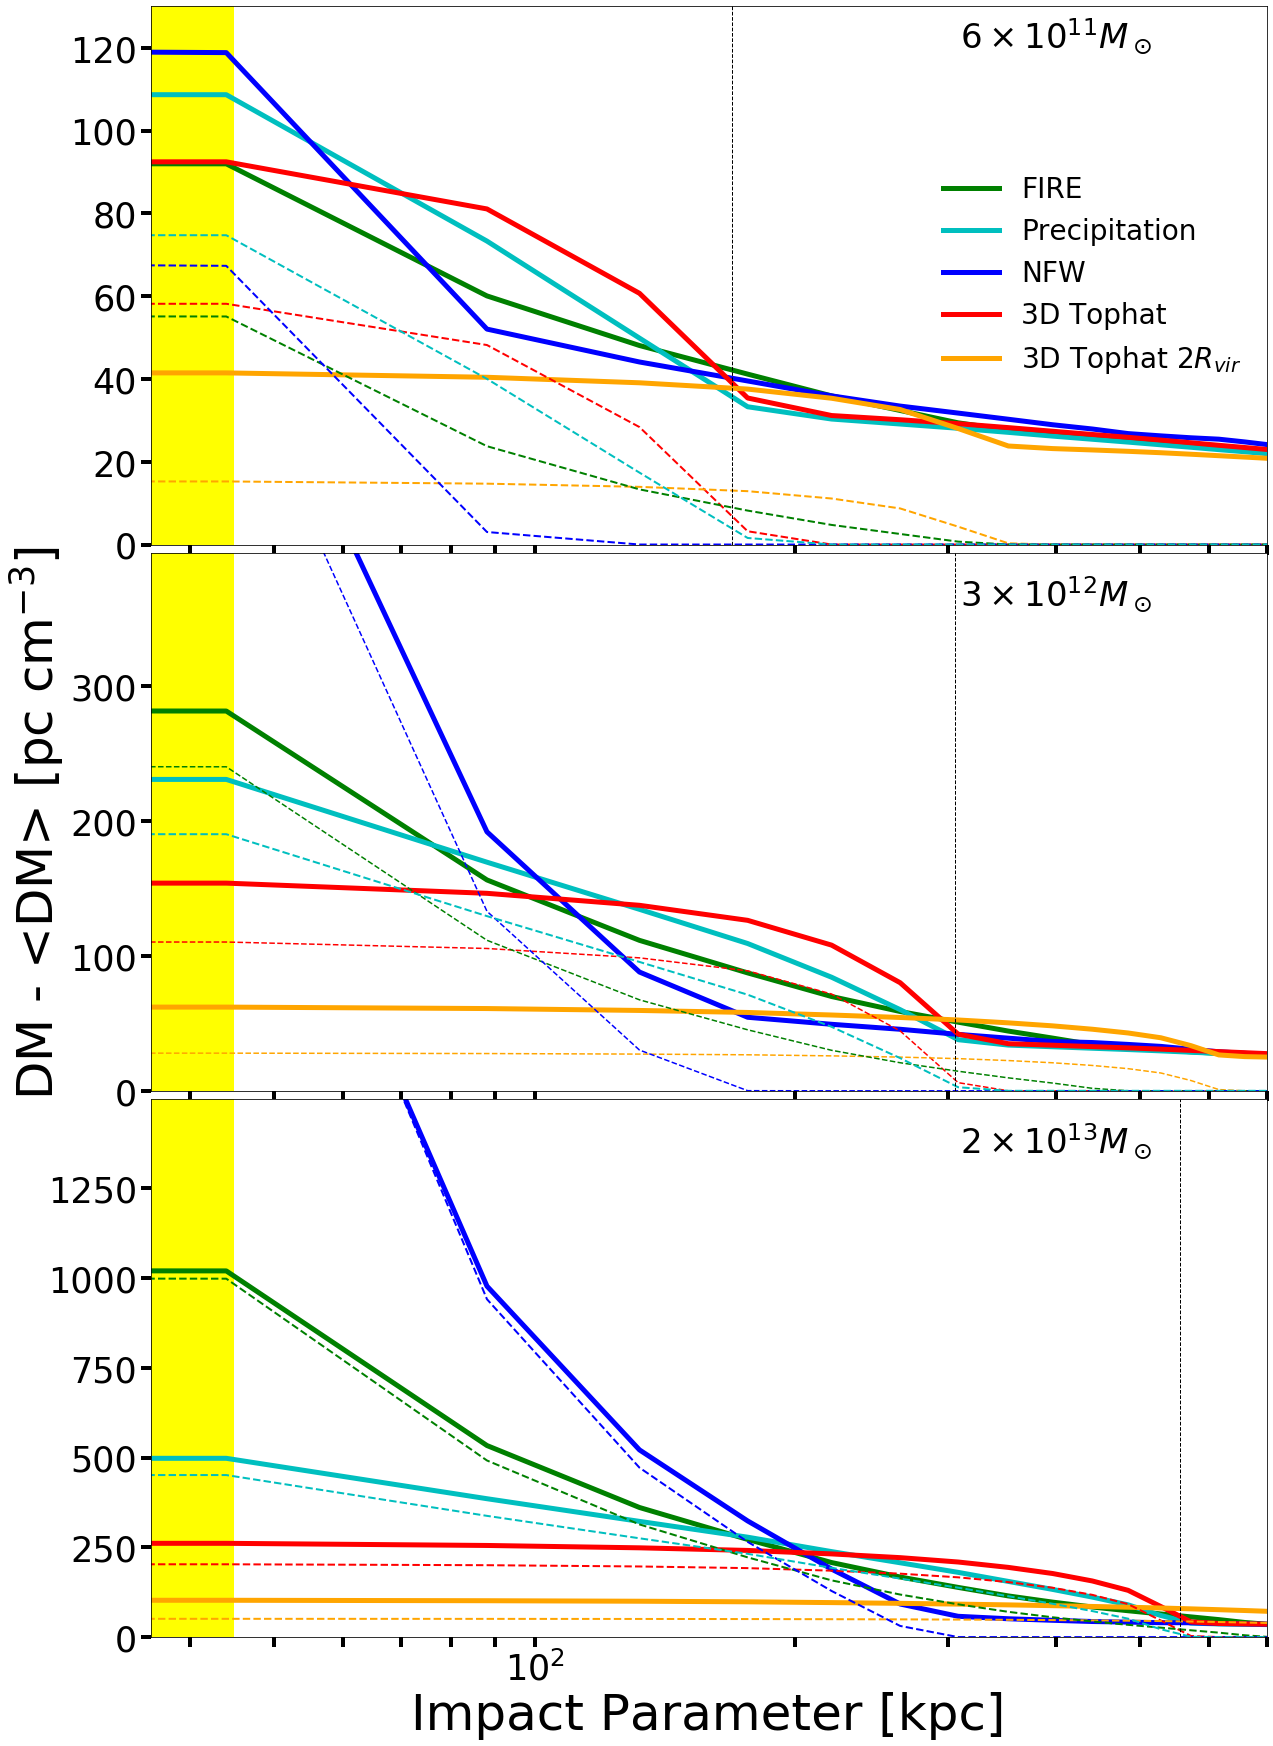

In [54]:
# figure and subplots

M_chosen = [1,10,15,20,25]

MpctoKpc =1000
mask_rescale = np.sqrt(2)
x_start=0  #kpc: min impact parameter 


DM_Rad_fig, DM_Rad_axs = plt.subplots(3, 1,
                        gridspec_kw={'hspace': 0.015, 'wspace': .2},figsize=(20,30))


# X-axis: mask grid has a diagonal of length sqrt(2) that needs to be factored in after the profile is calculated
x_axis = np.sqrt(2)*MpctoKpc*np.linspace(0,extent,STH8_DMvsR.shape[1])



# First plot

# DM_Rad_axs[0].semilogx(np.linspace(0,extent,TH_DMvsR.shape[1]),TH_DMvsR[M_chosen[0],:]-mean_DM,'-', label= '2D tophat')
DM_Rad_axs[0].semilogx(x_axis,fire8_DMvsR[M_chosen[1],:]-mean_DM,'-', label= 'FIRE',lw=5,color='green')
DM_Rad_axs[0].semilogx(x_axis,P8_DMvsR[M_chosen[1],:]-mean_DM,'-' ,label= 'Precipitation',lw=5,color='c')
DM_Rad_axs[0].semilogx(x_axis,NFW8_DMvsR[M_chosen[1],:]-mean_DM,'-' ,label= 'NFW',lw=5,color='blue')
DM_Rad_axs[0].semilogx(x_axis,STH8_DMvsR[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat',lw=5,color= 'red')
DM_Rad_axs[0].semilogx(x_axis,STH8_2_DMvsR[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat 2$R_{vir}$',lw=5,color= 'orange')





# Masks
DM_Rad_axs[0].semilogx(x_axis,STH8_masks[M_chosen[1],:],'--', lw=2,color='red')
DM_Rad_axs[0].semilogx(x_axis,STH8_2_masks[M_chosen[1],:],'--', lw=2,color='orange')
DM_Rad_axs[0].semilogx(x_axis,fire8_masks[M_chosen[1],:],'--',lw=2,color='green')
DM_Rad_axs[0].semilogx(x_axis,NFW8_masks[M_chosen[1],:],'--', lw=2,color='blue')
DM_Rad_axs[0].semilogx(x_axis,P8_masks[M_chosen[1],:],'--', lw=2,color='c')




# axis title
# DM_Rad_axs[0].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[1]]),fontsize=14)


# Second plot

DM_Rad_axs[1].semilogx(x_axis,fire8_DMvsR[M_chosen[2],:]-mean_DM,'-' ,label= 'fire',lw=5,color='green')
DM_Rad_axs[1].semilogx(x_axis,P8_DMvsR[M_chosen[2],:]-mean_DM,'-' ,label= 'Precipitation',lw=5,color='c')
DM_Rad_axs[1].semilogx(x_axis,NFW8_DMvsR[M_chosen[2],:]-mean_DM,'-', label= 'NFW',lw=5,color='blue')
DM_Rad_axs[1].semilogx(x_axis,STH8_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=5,color='red')
DM_Rad_axs[1].semilogx(x_axis,STH8_2_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=5,color='orange')


# Masks
DM_Rad_axs[1].semilogx(x_axis,STH8_masks[M_chosen[2],:],'--', lw=1.5,color='red')
DM_Rad_axs[1].semilogx(x_axis,STH8_2_masks[M_chosen[2],:],'--', lw=1.5,color='orange')
DM_Rad_axs[1].semilogx(x_axis,fire8_masks[M_chosen[2],:],'--',lw=1.5,color='green')
DM_Rad_axs[1].semilogx(x_axis,NFW8_masks[M_chosen[2],:],'--', lw=1.5,color='blue')
DM_Rad_axs[1].semilogx(x_axis,P8_masks[M_chosen[2],:],'--', lw=2,color='c')




# Error bar
# STH
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_STH,ls='--',drawstyle='steps',color='red',lw=.5)
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_STH2,ls='--',drawstyle='steps',color='orange',lw=.5)
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_fire,ls='--',drawstyle='steps',color='green',lw=.5)
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_NFW,ls='--',drawstyle='steps',color='blue',lw=.5)




# DM_Rad_axs[1].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[2]]),fontsize=14)




# Third plot


DM_Rad_axs[2].semilogx(x_axis,fire8_DMvsR[M_chosen[3],:]-mean_DM,'-', label= 'Fire',lw=5,color='green')
DM_Rad_axs[2].semilogx(x_axis,P8_DMvsR[M_chosen[3],:]-mean_DM,'-' ,label= 'Precipitation',lw=5,color='c')
DM_Rad_axs[2].semilogx(x_axis,NFW8_DMvsR[M_chosen[3],:]-mean_DM, '-',label= 'NFW',lw=5,color='blue')
DM_Rad_axs[2].semilogx(x_axis,STH8_DMvsR[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=5,color='red')
DM_Rad_axs[2].semilogx(x_axis,STH8_2_DMvsR[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=5,color='orange')

DM_Rad_axs[2].semilogx(x_axis,STH8_masks[M_chosen[3],:],'--', lw=2,color='red')
DM_Rad_axs[2].semilogx(x_axis,STH8_2_masks[M_chosen[3],:],'--', lw=2,color='orange')
DM_Rad_axs[2].semilogx(x_axis,fire8_masks[M_chosen[3],:],'--',lw=2,color='green')
DM_Rad_axs[2].semilogx(x_axis,NFW8_masks[M_chosen[3],:], '--',lw=2,color='blue')
DM_Rad_axs[2].semilogx(x_axis,P8_masks[M_chosen[3],:],'--', lw=2,color='c')



# DM_Rad_axs[2].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[3]]),fontsize=14)




# ticks

# ax.xaxis.grid(True, which='minor')
# DM_Rad_axs[0].xaxis.grid(axis='x', which='minor', bottom=True)

# DM_Rad_axs[0].tick_params(axis='x', which='minor', bottom=True)
# DM_Rad_axs[1].tick_params(axis='x', which='minor', bottom=True)

# DM_Rad_axs[0].tick_params(axis='x', which='minor',fontsize=10)
# DM_Rad_axs[2].xaxis.set_tick_params(width=5)



DM_Rad_axs[0].tick_params('both', length=10, width=4, which='major')
DM_Rad_axs[0].tick_params('both', length=10, width=4, which='minor')

DM_Rad_axs[1].tick_params('both', length=10, width=4, which='major')
DM_Rad_axs[1].tick_params('both', length=10, width=4, which='minor')


DM_Rad_axs[2].tick_params('both', length=10, width=4, which='major')
DM_Rad_axs[2].tick_params('both', length=10, width=4, which='minor')


# legend

DM_Rad_axs[0].legend(loc='right',prop={'size':28}, frameon=False)
# DM_Rad_axs[0].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[1].set_ylabel('DM - <DM> [pc cm$^{-3}$]',fontsize=50)
# DM_Rad_axs[2].set_ylabel('DM - <DM> [pc cm$^{-3}$]',fontsize=30)
DM_Rad_axs[2].set_xlabel('Impact Parameter [kpc]',fontsize=50)



# Adding virial radii

DM_Rad_axs[0].axvline(MpctoKpc*(vir_rad_ar[M_chosen[1]]), color='k', linestyle='--', linewidth=1)
DM_Rad_axs[1].axvline(MpctoKpc*(vir_rad_ar[M_chosen[2]]), color='k', linestyle='--', linewidth=1)
DM_Rad_axs[2].axvline(MpctoKpc*(vir_rad_ar[M_chosen[3]]), color='k', linestyle='--', linewidth=1)


# x and y axis limits
DM_Rad_axs[0].set_ylim([0, 130])
DM_Rad_axs[0].set_xlim([x_start, .7*MpctoKpc])


DM_Rad_axs[1].set_ylim(ymin=0,ymax=399)
DM_Rad_axs[1].set_xlim([x_start, .7*MpctoKpc])


DM_Rad_axs[2].set_ylim(ymin=0,ymax=1499)
DM_Rad_axs[2].set_xlim([x_start, .7*MpctoKpc])


# Rectangular patch 
DM_Rad_axs[0].add_patch(Rectangle((0,0), 45, 130,facecolor='yellow'))
DM_Rad_axs[1].add_patch(Rectangle((0,0), 45, 399,facecolor='yellow'))
DM_Rad_axs[2].add_patch(Rectangle((0,0), 45, 1500,facecolor='yellow'))



# mass labels

DM_Rad_axs[0].text(310, 120, r'$6 \times 10^{11} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
DM_Rad_axs[1].text(310, 360,r'$3 \times 10^{12} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
DM_Rad_axs[2].text(310, 1350,r'$2 \times 10^{13} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)


# DM_Rad_axs[0].text(2*MpctoKpc*.1, 65, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
# DM_Rad_axs[1].text(2*MpctoKpc*.1, 180, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
# DM_Rad_axs[2].text(2*MpctoKpc*.1, 925, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)

# DM_Rad_axs[0].rc('xtick', labelsize=35)    # fontsize of the tick labels
# # plt.rc('ytick', labelsize=35)    # fontsize of the tick labels






DM_Rad_fig.savefig('DMvsRad_profiles_8.pdf',bbox_inches='tight')

# DM vs radius: Error bar plot

### For a MW sized halo:

In [20]:
# Array of radii for plotting
r_star_ar = np.logspace(np.log10(vir_rad_ar[M_chosen[3]]/25),np.log10(3*vir_rad_ar[M_chosen[3]]),10)
# r_star_ar_12 = np.logspace(np.log10(vir_rad_ar[M_chosen[2]]/10),np.log10(2*vir_rad_ar[M_chosen[2]]),10)
# r_star_ar_13 = np.logspace(np.log10(vir_rad_ar[M_chosen[3]]/10),np.log10(2*vir_rad_ar[M_chosen[3]]),10)


In [21]:
# Variances should be extracted from the redshift plots at redshift =0.5
var_STH_2 = 173
var_STH2_2 = 141
var_NFW_2 = 451
var_fire_2 = 226
var_P_2 = 215

sd_incl_host = np.sqrt(var_fire_2**2 + 300**2)

In [22]:
def error_bar_DMvsRad(sd,N_frb,radius_array,Rvir,avg_frbs):
    error_bar = np.zeros([len(radius_array)])
    for i in range(1,len(radius_array)):
        error_bar[i-1] = sd/(np.sqrt(avg_frbs*N_frb*((radius_array[i]**2-radius_array[i-1]**2)/Rvir**2)))
    
    return error_bar

In [23]:
# Nfrb =1000

error_100_12M_STH = error_bar_DMvsRad(var_STH_2,100,r_star_ar,vir_rad_ar[M_chosen[2]],2)
error_100_12M_fire = error_bar_DMvsRad(var_fire_2,100,r_star_ar,vir_rad_ar[M_chosen[2]],2)
error_100_12M_P = error_bar_DMvsRad(var_P_2,100,r_star_ar,vir_rad_ar[M_chosen[2]],2)

error_100_11M_STH = error_bar_DMvsRad(var_STH_2,100,r_star_ar,vir_rad_ar[M_chosen[1]],4)
error_100_11M_fire = error_bar_DMvsRad(var_fire_2,100,r_star_ar,vir_rad_ar[M_chosen[1]],4)
error_100_11M_P = error_bar_DMvsRad(var_P_2,100,r_star_ar,vir_rad_ar[M_chosen[1]],4)


error_100_13M_STH = error_bar_DMvsRad(var_STH_2,100,r_star_ar,vir_rad_ar[M_chosen[3]],.2)
error_100_13M_fire = error_bar_DMvsRad(var_fire_2,100,r_star_ar,vir_rad_ar[M_chosen[3]],.2)
error_100_13M_P = error_bar_DMvsRad(var_P_2,100,r_star_ar,vir_rad_ar[M_chosen[3]],.2)



# error when host halo DM is included
error_100_12M_fire_host = error_bar_DMvsRad(sd_incl_host,100,r_star_ar,vir_rad_ar[M_chosen[2]],2)

In [73]:
# 

# x_axis = np.linspace(0,extent,STH8_DMvsR.shape[1])
# test_error = error_bar_DMvsRad(sd_incl_host,100,x_axis,vir_rad_ar[M_chosen[2]],2)


### Error bar plot

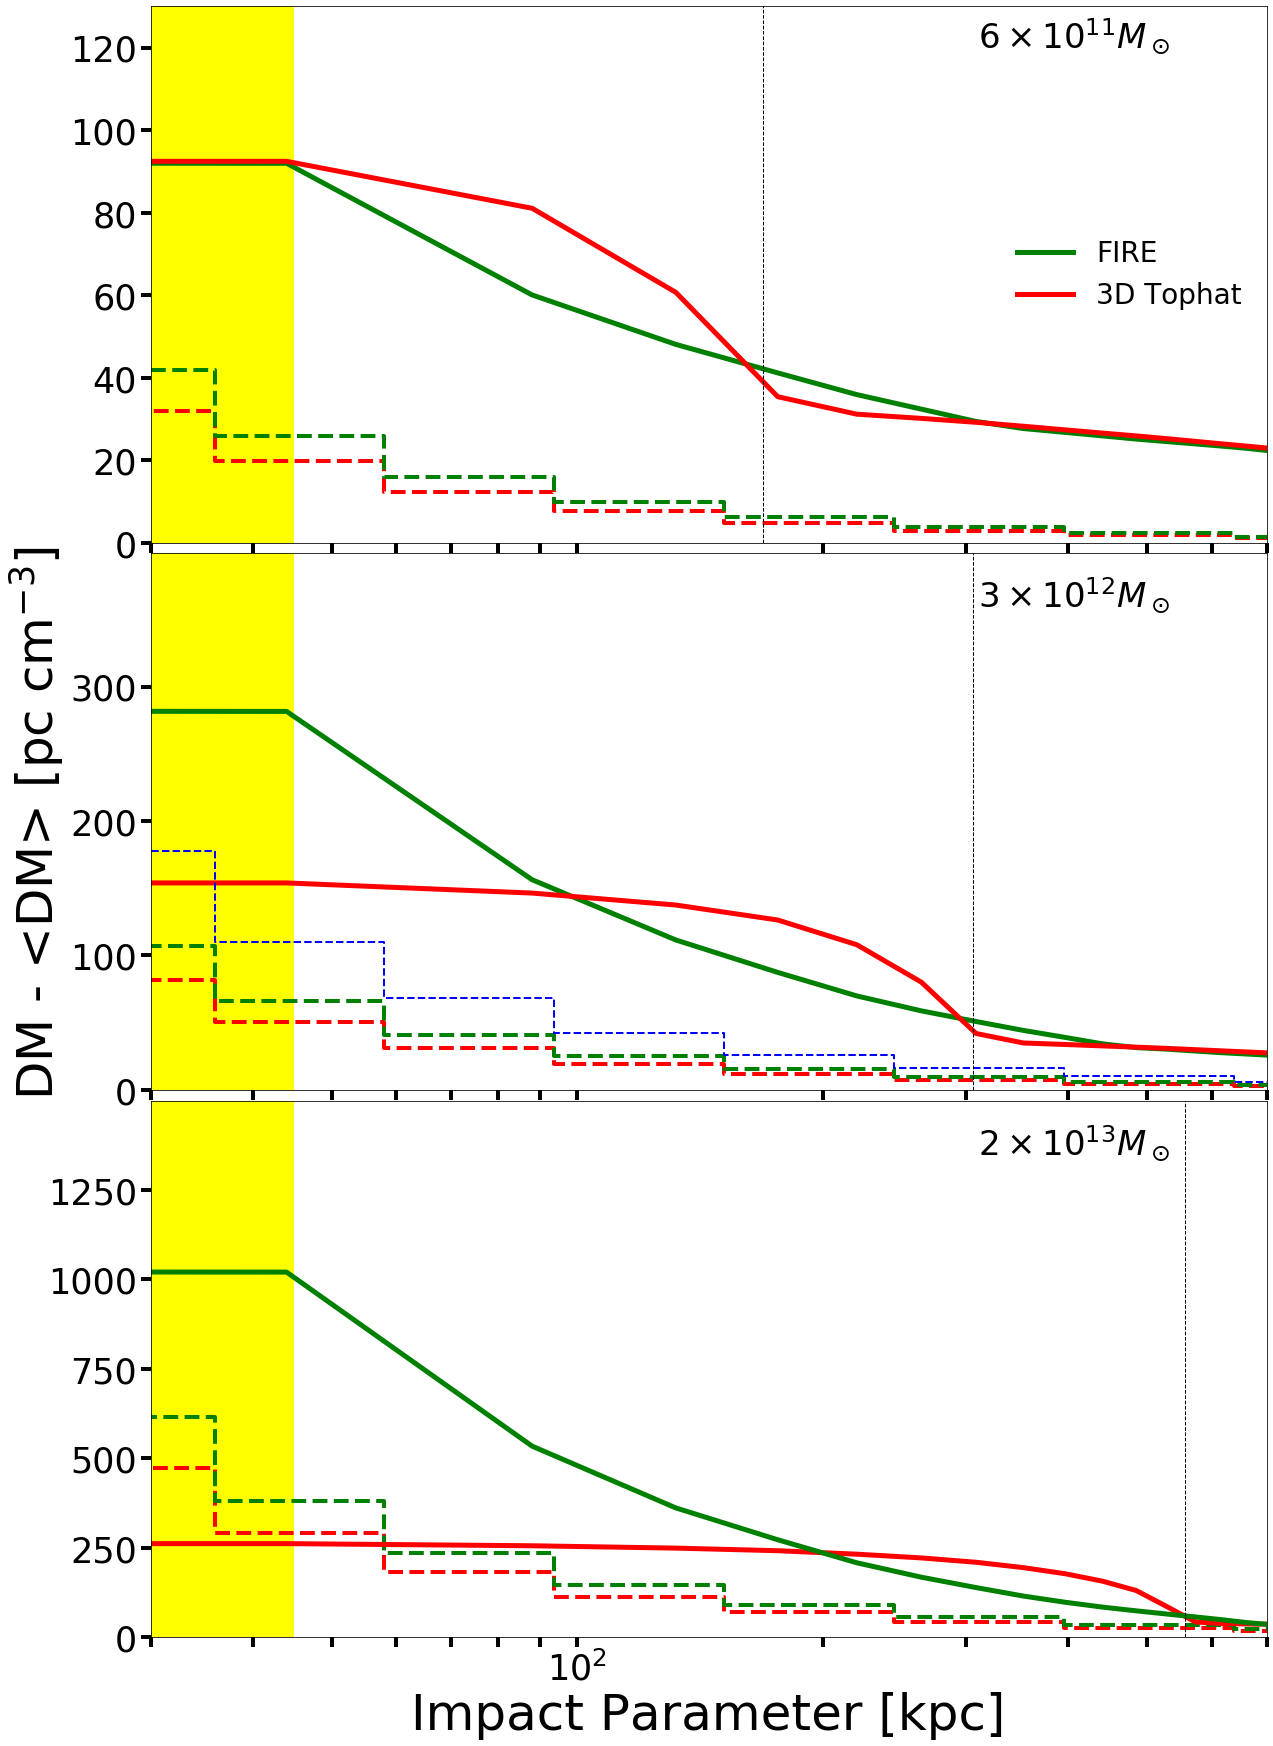

In [51]:
# figure and subplots


MpctoKpc =1000
x_start=30  #kpc: min impact parameter 


DM_Rad_fig, DM_Rad_axs = plt.subplots(3, 1,
                        gridspec_kw={'hspace': 0.02, 'wspace': .2},figsize=(20,30))

plt.rc('xtick', labelsize=35)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)    # fontsize of the tick labels

# X-axis
x_axis = np.sqrt(2)*MpctoKpc*np.linspace(0,extent,STH8_DMvsR.shape[1])



# First plot



DM_Rad_axs[0].semilogx(x_axis,fire8_DMvsR[M_chosen[1],:]-mean_DM,'-', label= 'FIRE',lw=5,color='green')
DM_Rad_axs[0].semilogx(x_axis,STH8_DMvsR[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat',lw=5,color= 'red')
# DM_Rad_axs[0].semilogx(x_axis,STH_2_DMvsR[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat 2Rvir',lw=4,color= 'orange')

# DM_Rad_axs[0].semilogx(x_axis,NFW_DMvsR[M_chosen[1],:]-mean_DM,'-' ,label= 'NFW',lw=4,color='blue')
# DM_Rad_axs[0].semilogx(x_axis,P_DMvsR[M_chosen[1],:]-mean_DM,'-' ,label= 'Precipitation',lw=4,color='c')

# DM_Rad_axs[0].errorbar(x_axis,STH8_DMvsR[M_chosen[1],:]-mean_DM,yerr=test_error,ecolor='black')





# Second plot

DM_Rad_axs[1].semilogx(x_axis,fire8_DMvsR[M_chosen[2],:]-mean_DM,'-' ,label= 'fire',lw=5,color='green')
DM_Rad_axs[1].semilogx(x_axis,STH8_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=5,color='red')
# DM_Rad_axs[1].semilogx(x_axis,STH_2_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=4,color='orange')

# DM_Rad_axs[1].semilogx(x_axis,NFW_DMvsR[M_chosen[2],:]-mean_DM,'-', label= 'NFW',lw=4,color='blue')
# DM_Rad_axs[1].semilogx(x_axis,P_DMvsR[M_chosen[2],:]-mean_DM,'-' ,label= 'Precipitation',lw=4,color='c')





DM_Rad_axs[1].set_ylim(ymin=0,ymax=199)
DM_Rad_axs[1].set_xlim([x_start, MpctoKpc*2])


# Error bar plots

DM_Rad_axs[0].semilogx(r_star_ar*1000,error_100_11M_STH,ls='--',drawstyle='steps',color='red',lw=4)
DM_Rad_axs[0].semilogx(r_star_ar*1000,error_100_11M_fire,ls='--',drawstyle='steps',color='green',lw=4)


DM_Rad_axs[1].semilogx(r_star_ar*1000,error_100_12M_STH,ls='--',drawstyle='steps',color='red',lw=4)
DM_Rad_axs[1].semilogx(r_star_ar*1000,error_100_12M_fire,ls='--',drawstyle='steps',color='green',lw=4)
DM_Rad_axs[1].semilogx(r_star_ar*1000,error_100_12M_fire_host,ls='--',drawstyle='steps',color='blue',lw=2)


DM_Rad_axs[2].semilogx(r_star_ar*1000,error_100_13M_STH,ls='--',drawstyle='steps',color='red',lw=4)
DM_Rad_axs[2].semilogx(r_star_ar*1000,error_100_13M_fire,ls='--',drawstyle='steps',color='green',lw=4)







# Third plot


DM_Rad_axs[2].semilogx(x_axis,STH8_DMvsR[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=5,color='red')
# DM_Rad_axs[2].semilogx(x_axis,STH_2_DMvsR[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=4,color='orange')
DM_Rad_axs[2].semilogx(x_axis,fire8_DMvsR[M_chosen[3],:]-mean_DM,'-', label= 'Fire',lw=5,color='green')
# DM_Rad_axs[2].semilogx(x_axis,NFW_DMvsR[M_chosen[3],:]-mean_DM, '-',label= 'NFW',lw=4,color='blue')
# DM_Rad_axs[2].semilogx(x_axis,P_DMvsR[M_chosen[3],:]-mean_DM,'-' ,label= 'Precipitation',lw=4,color='c')





# ticks


# DM_Rad_axs[0].tick_params(axis='x', which='major', bottom=True)
# DM_Rad_axs[1].tick_params(axis='x', which='minor', bottom=True)

# DM_Rad_axs[0].set_xticks([0])


# legend
# DM_Rad_axs[0].legend(loc='upper right',prop={'size':24})
# # DM_Rad_axs[0].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
# DM_Rad_axs[1].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=50)
# # DM_Rad_axs[2].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
# DM_Rad_axs[2].set_xlabel('Impact Parameter [kpc]',fontsize=50)





# mass labels
# DM_Rad_axs[0].text(2*MpctoKpc*.1, 65, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
# DM_Rad_axs[1].text(2*MpctoKpc*.1, 180, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
# DM_Rad_axs[2].text(2*MpctoKpc*.1, 925, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)



# legend

DM_Rad_axs[0].legend(loc='right',prop={'size':28},frameon=False)
# DM_Rad_axs[0].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[1].set_ylabel('DM - <DM> [pc cm$^{-3}$]',fontsize=50)
# DM_Rad_axs[2].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[2].set_xlabel('Impact Parameter [kpc]',fontsize=50)



# Adding virial radii

DM_Rad_axs[0].axvline(MpctoKpc*(vir_rad_ar[M_chosen[1]]), color='k', linestyle='--', linewidth=1)
DM_Rad_axs[1].axvline(MpctoKpc*(vir_rad_ar[M_chosen[2]]), color='k', linestyle='--', linewidth=1)
DM_Rad_axs[2].axvline(MpctoKpc*(vir_rad_ar[M_chosen[3]]), color='k', linestyle='--', linewidth=1)


# x and y axis limits
DM_Rad_axs[0].set_ylim([0, 130])
DM_Rad_axs[0].set_xlim([x_start, .7*MpctoKpc])


DM_Rad_axs[1].set_ylim(ymin=0,ymax=399)
DM_Rad_axs[1].set_xlim([x_start, .7*MpctoKpc])


DM_Rad_axs[2].set_ylim(ymin=0,ymax=1499)
DM_Rad_axs[2].set_xlim([x_start, .7*MpctoKpc])


DM_Rad_axs[0].add_patch(Rectangle((0,0), 45, 130,facecolor='yellow'))
DM_Rad_axs[1].add_patch(Rectangle((0,0), 45, 399,facecolor='yellow'))
DM_Rad_axs[2].add_patch(Rectangle((0,0), 45, 1500,facecolor='yellow'))


# mass labels

DM_Rad_axs[0].text(310, 120, r'$6 \times 10^{11} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
DM_Rad_axs[1].text(310, 360,r'$3 \times 10^{12} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
DM_Rad_axs[2].text(310, 1350,r'$2 \times 10^{13} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)


# Ticks
DM_Rad_axs[0].tick_params('both', length=10, width=4, which='major')
DM_Rad_axs[0].tick_params('both', length=10, width=4, which='minor')

DM_Rad_axs[1].tick_params('both', length=10, width=4, which='major')
DM_Rad_axs[1].tick_params('both', length=10, width=4, which='minor')


DM_Rad_axs[2].tick_params('both', length=10, width=4, which='major')
DM_Rad_axs[2].tick_params('both', length=10, width=4, which='minor')



DM_Rad_fig.savefig('DMvsRad_profiles_error.pdf',bbox_inches='tight')

# Plot for Matt

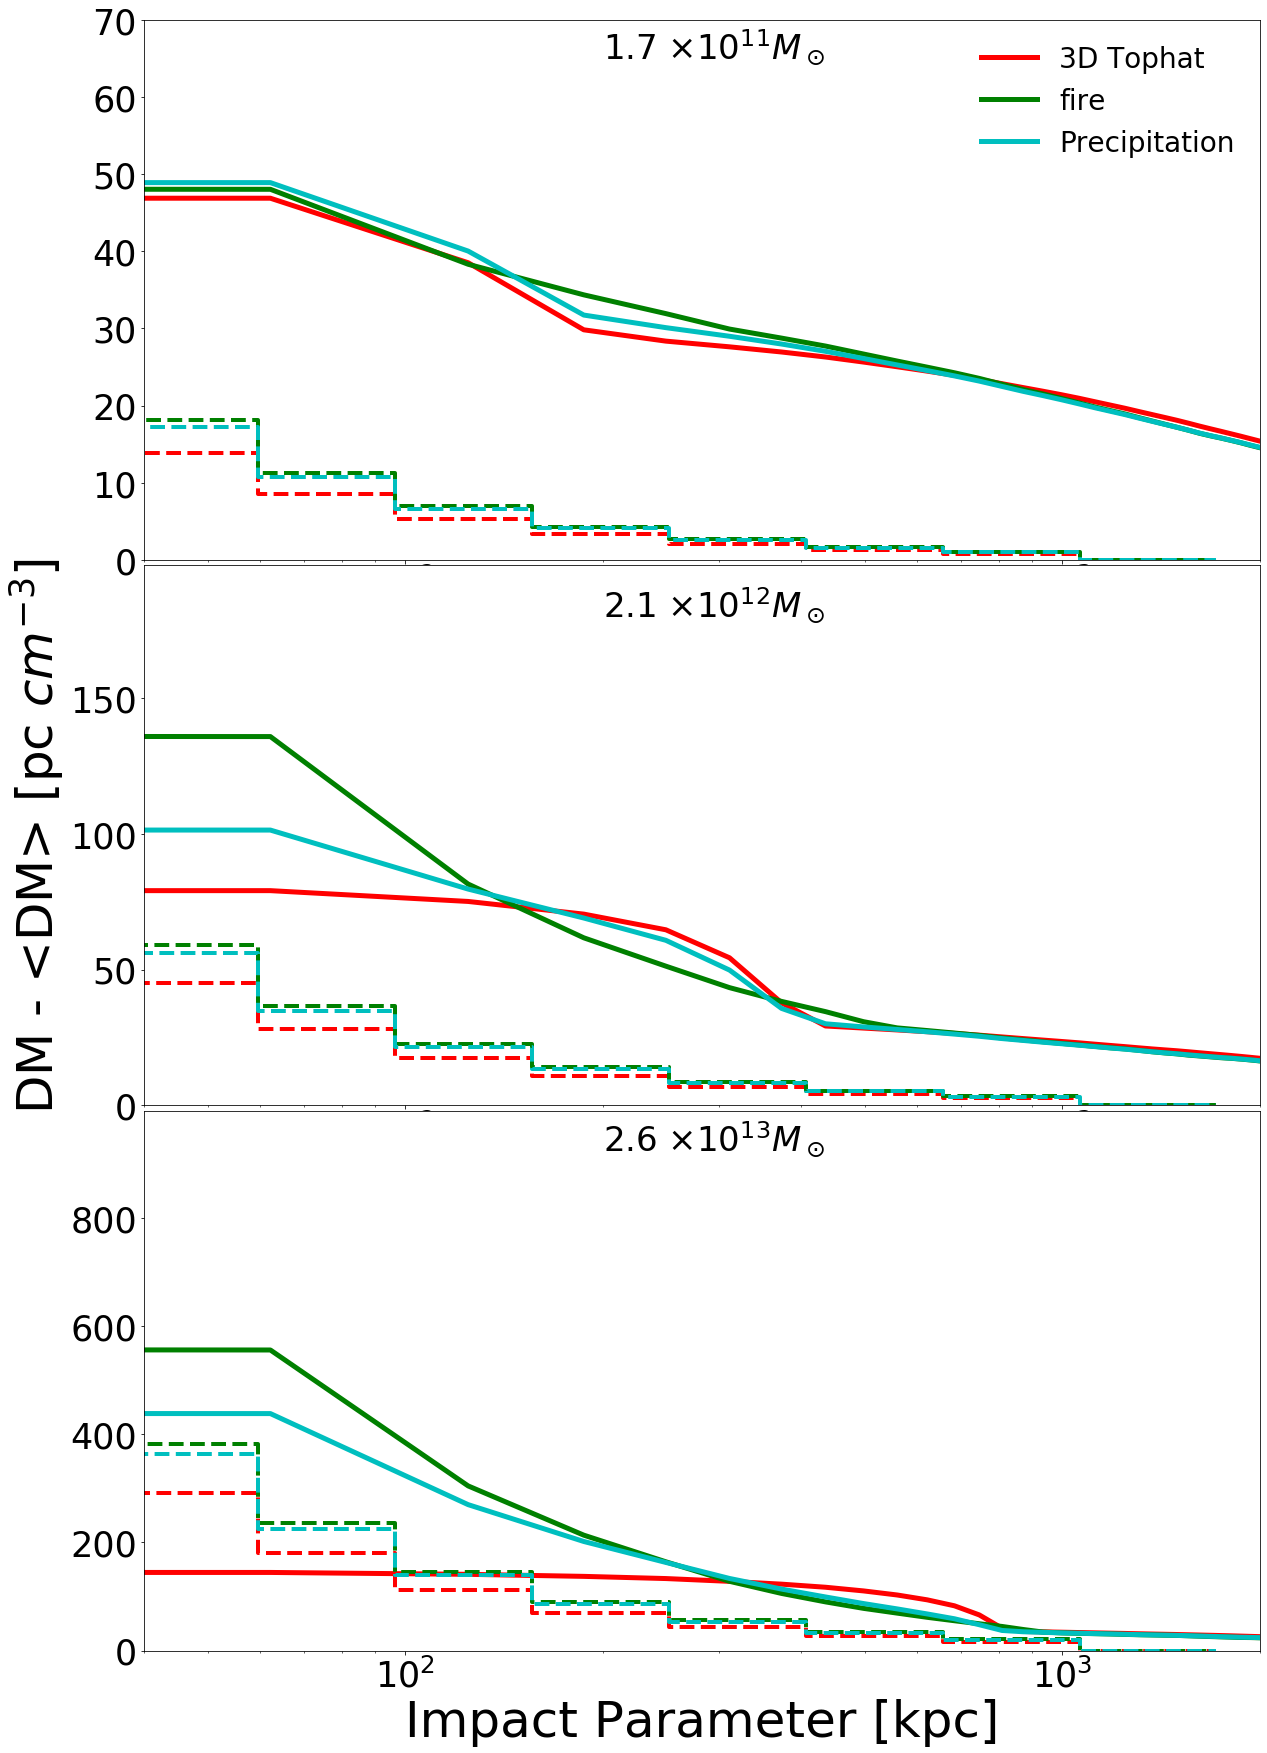

In [240]:
# figure and subplots


MpctoKpc =1000
x_start=40  #kpc: min impact parameter 


DM_Rad_fig, DM_Rad_axs = plt.subplots(3, 1,
                        gridspec_kw={'hspace': 0.01, 'wspace': .2},figsize=(20,30))


# plt.rc('axes', titlesize=30)     # fontsize of the axes title
# plt.rc('axes', labelsize=20)    # fontsize of the x and y labels



# First plot

# DM_Rad_axs[0].semilogx(np.linspace(0,extent,TH_DMvsR.shape[1]),TH_DMvsR[M_chosen[0],:]-mean_DM,'-', label= '2D tophat')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,STH8_DMvsR.shape[1]),STH8_DMvsR[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat',lw=5,color= 'red')
# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,STH8_2_DMvsR.shape[1]),STH8_2_DMvsR[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat 2$R_{vir}$',lw=5,color= 'orange')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,fire8_DMvsR.shape[1]),fire8_DMvsR[M_chosen[1],:]-mean_DM,'-', label= 'fire',lw=5,color='green')
# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,NFW8_DMvsR.shape[1]),NFW8_DMvsR[M_chosen[1],:]-mean_DM,'-' ,label= 'NFW',lw=5,color='blue')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,P8_DMvsR.shape[1]),P8_DMvsR[M_chosen[1],:]-mean_DM,'-' ,label= 'Precipitation',lw=5,color='c')


# Masks
# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,STH8_masks.shape[1]),STH8_masks[M_chosen[1],:],'--', lw=2,color='red')
# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,STH8_2_masks.shape[1]),STH8_2_masks[M_chosen[1],:],'--', lw=2,color='orange')
# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,fire8_masks.shape[1]),fire8_masks[M_chosen[1],:],'--',lw=2,color='green')
# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,NFW8_masks.shape[1]),NFW8_masks[M_chosen[1],:],'--', lw=2,color='blue')


# DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,P8_masks.shape[1]),P8_masks[M_chosen[1],:],'--', lw=2,color='c')




# axis title
# DM_Rad_axs[0].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[1]]),fontsize=14)


# Second plot


DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,STH8_DMvsR.shape[1]),STH8_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=5,color='red')
# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,STH8_2_DMvsR.shape[1]),STH8_2_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=5,color='orange')
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,fire8_DMvsR.shape[1]),fire8_DMvsR[M_chosen[2],:]-mean_DM,'-' ,label= 'fire',lw=5,color='green')
# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,NFW8_DMvsR.shape[1]),NFW8_DMvsR[M_chosen[2],:]-mean_DM,'-', label= 'NFW',lw=5,color='blue')
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,P8_DMvsR.shape[1]),P8_DMvsR[M_chosen[2],:]-mean_DM,'-' ,label= 'Precipitation',lw=5,color='c')


# Masks
# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,STH8_masks.shape[1]),STH8_masks[M_chosen[2],:],'--', lw=1.5,color='red')
# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,STH8_2_masks.shape[1]),STH8_2_masks[M_chosen[2],:],'--', lw=1.5,color='orange')
# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,fire8_masks.shape[1]),fire8_masks[M_chosen[2],:],'--',lw=1.5,color='green')
# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,NFW8_masks.shape[1]),NFW8_masks[M_chosen[2],:],'--', lw=1.5,color='blue')

# DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,P8_masks.shape[1]),P8_masks[M_chosen[2],:],'--', lw=2,color='c')




# Error bar
# STH
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_STH,ls='--',drawstyle='steps',color='red',lw=.5)
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_STH2,ls='--',drawstyle='steps',color='orange',lw=.5)
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_fire,ls='--',drawstyle='steps',color='green',lw=.5)
# DM_Rad_axs[1].semilogx(r_star_ar*1000,error_1000_MW_NFW,ls='--',drawstyle='steps',color='blue',lw=.5)




# DM_Rad_axs[1].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[2]]),fontsize=14)




# Third plot


DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,STH8_DMvsR.shape[1]),STH8_DMvsR[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=5,color='red')
# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,STH8_2_DMvsR.shape[1]),STH8_2_DMvsR[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=5,color='orange')
DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,fire8_DMvsR.shape[1]),fire8_DMvsR[M_chosen[3],:]-mean_DM,'-', label= 'Fire',lw=5,color='green')
# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,NFW8_DMvsR.shape[1]),NFW8_DMvsR[M_chosen[3],:]-mean_DM, '-',label= 'NFW',lw=5,color='blue')
DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,P8_DMvsR.shape[1]),P8_DMvsR[M_chosen[3],:]-mean_DM,'-' ,label= 'Precipitation',lw=5,color='c')

# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,STH8_masks.shape[1]),STH8_masks[M_chosen[3],:],'--', lw=2,color='red')
# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,STH8_2_masks.shape[1]),STH8_2_masks[M_chosen[3],:],'--', lw=2,color='orange')
# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,fire8_masks.shape[1]),fire8_masks[M_chosen[3],:],'--',lw=2,color='green')
# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,NFW8_masks.shape[1]),NFW8_masks[M_chosen[3],:], '--',lw=2,color='blue')
# DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,P8_masks.shape[1]),P8_masks[M_chosen[3],:],'--', lw=2,color='c')



# Error bars

DM_Rad_axs[0].semilogx(r_star_ar*1000,error_100_11M_STH,ls='--',drawstyle='steps',color='red',lw=4)
DM_Rad_axs[0].semilogx(r_star_ar*1000,error_100_11M_fire,ls='--',drawstyle='steps',color='green',lw=4)
DM_Rad_axs[0].semilogx(r_star_ar*1000,error_100_11M_P,ls='--',drawstyle='steps',color='c',lw=4)


DM_Rad_axs[1].semilogx(r_star_ar*1000,error_100_12M_STH,ls='--',drawstyle='steps',color='red',lw=4)
DM_Rad_axs[1].semilogx(r_star_ar*1000,error_100_12M_fire,ls='--',drawstyle='steps',color='green',lw=4)
DM_Rad_axs[1].semilogx(r_star_ar*1000,error_100_12M_P,ls='--',drawstyle='steps',color='c',lw=4)


DM_Rad_axs[2].semilogx(r_star_ar*1000,error_100_13M_STH,ls='--',drawstyle='steps',color='red',lw=4)
DM_Rad_axs[2].semilogx(r_star_ar*1000,error_100_13M_fire,ls='--',drawstyle='steps',color='green',lw=4)
DM_Rad_axs[2].semilogx(r_star_ar*1000,error_100_13M_P,ls='--',drawstyle='steps',color='c',lw=4)




# DM_Rad_axs[2].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[3]]),fontsize=14)




# ticks

# ax.xaxis.grid(True, which='minor')
# DM_Rad_axs[0].xaxis.grid(axis='x', which='minor', bottom=True)

# DM_Rad_axs[0].tick_params(axis='x', which='minor', bottom=True)
# DM_Rad_axs[1].tick_params(axis='x', which='minor', bottom=True)

DM_Rad_axs[0].tick_params(axis='x', which='minor')

# legend

DM_Rad_axs[0].legend(loc='upper right',prop={'size':28}, frameon=False)
# DM_Rad_axs[0].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[1].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=50)
# DM_Rad_axs[2].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[2].set_xlabel('Impact Parameter [kpc]',fontsize=50)



# Adding virial radii

# DM_Rad_axs[0].axvline(MpctoKpc*(vir_rad_ar[M_chosen[1]]), color='k', linestyle='--', linewidth=1)
# DM_Rad_axs[1].axvline(MpctoKpc*(vir_rad_ar[M_chosen[2]]), color='k', linestyle='--', linewidth=1)
# DM_Rad_axs[2].axvline(MpctoKpc*(vir_rad_ar[M_chosen[3]]), color='k', linestyle='--', linewidth=1)


# x and y axis limits
DM_Rad_axs[0].set_ylim([0, 70])
DM_Rad_axs[0].set_xlim([x_start, MpctoKpc*2])


DM_Rad_axs[1].set_ylim(ymin=0,ymax=199)
DM_Rad_axs[1].set_xlim([x_start, MpctoKpc*2])


DM_Rad_axs[2].set_ylim(ymin=0,ymax=999)
DM_Rad_axs[2].set_xlim([x_start, MpctoKpc*2])


# mass labels

DM_Rad_axs[0].text(2*MpctoKpc*.1, 65, r'1.7 $\times 10^{11} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
DM_Rad_axs[1].text(2*MpctoKpc*.1, 180,r'2.1 $\times 10^{12} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
DM_Rad_axs[2].text(2*MpctoKpc*.1, 925,r'2.6 $\times 10^{13} M_\odot$ ',fontsize=34) #'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)


# DM_Rad_axs[0].text(2*MpctoKpc*.1, 65, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=30)
# DM_Rad_axs[1].text(2*MpctoKpc*.1, 180, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=30)
# DM_Rad_axs[2].text(2*MpctoKpc*.1, 925, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=30)

# DM_Rad_axs[0].rc('xtick', labelsize=35)    # fontsize of the tick labels
# # plt.rc('ytick', labelsize=35)    # fontsize of the tick labels



DM_Rad_fig.savefig('DMvsRad_profiles_8.pdf',bbox_inches='tight')

# 3. Redshift stacking

#### File naming convention for higher redshift files:

##### density file name: dens256-z-0 , dens256-z-0.1, dens256-z-0.2, etc
If you are using the same file, create as many copies of the first file as you need to go to the desired redshift using the above naming convention


##### halos file name: halo-z-0.0 , halo-z-0.1, halo-z-0.1, etc
If you are using the same file, create as many copies of the first file as you need to go to the desired redshift using the above naming convention



In [76]:
# We can create different redshift arrays


# RS_array = [avgZ(1),avgZ(2),avgZ(3)]
# RS_array = [avgZ(1),avgZ(2),avgZ(3),avgZ(4),avgZ(5)]
# RS_array = [avgZ(1),avgZ(2),avgZ(3),avgZ(4),avgZ(5),avgZ(6),avgZ(7),avgZ(8),avgZ(9)]

# RS_array = RS_array_gen(1,L)

RS_array = RS_array_gen(1,L)

# subtraction profile
subtraction_halo_profile = 'NFW'

# resolution
den_grid_size = 256

# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30


In [77]:
all_den_fields_256_RS = extract_all_den_fields(RS_array,den_grid_size)

In [78]:
# Smoothing the unsmoothed fields

for i in range(1,len(RS_array)):
    test_s = all_den_fields_256_RS[i,:,:]
    test_l= (np.repeat((np.repeat(test_s,4,axis=0)),4,axis=1))

    test_sm =  gauss_sinc_smoothing(test_l,4/np.sqrt(3),4,1)
    all_den_fields_256_RS[i,:,:]= test_sm.reshape([256, 4, 256, 4]).mean(3).mean(1)

In [267]:
# np.save('all_den_fields_256_RS',all_den_fields_256_RS)
all_den_fields_256_RS = np.load('all_den_fields_256_RS.npy',allow_pickle=True)

In [12]:
## Array for higher redshifts



# STH1_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                  log_bins,subtraction_halo_profile,'tophat_spherical',1,1)


# STH1_2_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,'tophat_spherical',2,1)

# NFW1_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,'fire',1,1)
# fire1_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,'fire',1,1)














/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


In [8]:
STH8_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'tophat_spherical',1,8)

np.save('STH8_256_RS_array',STH8_256_RS_array[6])

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in less_equal


In [10]:
STH8_2_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'tophat_spherical',2,8)

np.save('STH8_2_256_RS_array',STH8_2_256_RS_array[6])

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in less_equal


In [7]:
NFW8_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'NFW',1,8)

np.save('NFW8_256_RS_array',NFW8_256_RS_array[6])

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in greater


In [ ]:
fire8_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'fire',1,8)

np.save('fire8_256_RS_array',fire8_256_RS_array[6])

In [79]:
# P8_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,'precipitation',1,8)

# np.save('P8_256_RS_array',P8_256_RS_array[6])


P1_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'precipitation',1,1)

np.save('P1_256_RS_array',P1_256_RS_array[6])


# P4_256_RS_array = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,'precipitation',1,4)

# np.save('P4_256_RS_array',P4_256_RS_array[6])



0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in greater
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The erro

LinAlgError: Collocation matix is singular.

In [55]:
P1_256_RS_array

NameError: name 'P1_256_RS_array' is not defined

In [9]:
# Saving arrays of DM to high redshifts

# np.save('STH1_256_RS_array',STH1_256_RS_array[6])






# Load arrays
# STH1_256_RS_array_L = np.load('STH1_256_RS_array.npy',allow_pickle=True)
# STH8_256_RS_array_L = np.load('STH8_256_RS_array.npy',allow_pickle=True)
# STH8_2_256_RS_array_L = np.load('STH8_2_256_RS_array.npy',allow_pickle=True)
# NFW8_256_RS_array_L = np.load('NFW8_256_RS_array.npy',allow_pickle=True)
# fire8_256_RS_array_L = np.load('fire8_256_RS_array.npy',allow_pickle=True)
# P8_256_RS_array_L = np.load('P8_256_RS_array.npy',allow_pickle=True)


In [79]:
# Creating histograms for desired redshift

# To RS = .5
STH_RS_tenth= create_histograms(STH8_256_RS_array_L[0:1,:,:],1024*8,0,3*np.mean(sum(STH8_256_RS_array_L[0:1,:,:])))
STH_RS_half = create_histograms(STH8_256_RS_array_L[0:5,:,:],1024*8,0,3*np.mean(sum(STH8_256_RS_array_L[0:5,:,:])))
STH_RS_one = create_histograms(STH8_256_RS_array_L[0:8,:,:],1024*8,0,3*np.mean(sum(STH8_256_RS_array_L[0:8,:,:])))




NFW_RS_tenth= create_histograms(NFW8_256_RS_array_L[0:1,:,:],1024*8,0,3*np.mean(sum(NFW8_256_RS_array_L[0:1,:,:])))
NFW_RS_half = create_histograms(NFW8_256_RS_array_L[0:5,:,:],1024*8,0,3*np.mean(sum(NFW8_256_RS_array_L[0:5,:,:])))
NFW_RS_one = create_histograms(NFW8_256_RS_array_L[0:8,:,:],1024*8,0,3*np.mean(sum(NFW8_256_RS_array_L[0:8,:,:])))


fire_RS_tenth= create_histograms(fire8_256_RS_array_L[0:1,:,:],1024*8,0,3*np.mean(sum(fire8_256_RS_array_L[0:1,:,:])))
fire_RS_half = create_histograms(fire8_256_RS_array_L[0:5,:,:],1024*8,0,3*np.mean(sum(fire8_256_RS_array_L[0:5,:,:])))
fire_RS_one = create_histograms(fire8_256_RS_array_L[0:8,:,:],1024*8,0,3*np.mean(sum(fire8_256_RS_array_L[0:8,:,:])))




STH8_2_1 = create_histograms(STH8_2_256_RS_array_L[0:1,:,:],1024*8,0,3*np.mean(sum(STH8_2_256_RS_array_L[0:1,:,:])))
STH8_2_5 = create_histograms(STH8_2_256_RS_array_L[0:5,:,:],1024*8,0,3*np.mean(sum(STH8_2_256_RS_array_L[0:5,:,:])))
STH8_2_10 = create_histograms(STH8_2_256_RS_array_L[0:8,:,:],1024*8,0,3*np.mean(sum(STH8_2_256_RS_array_L[0:8,:,:])))


# STH8_2_1 = create_histograms(STH8_2_256_L[0:1,:,:],1024*8)
# STH8_2_5 = create_histograms(STH8_2_256_L[0:5,:,:],1024*8)
# STH8_2_10 = create_histograms(STH8_2_256_L[0:8,:,:],1024*8)


# P_RS_tenth= create_histograms(P8_256_RS_array[0:1,:,:],1024*8)
# P_RS_half = create_histograms(P8_256_RS_array[0:5,:,:],1024*8)
# P_RS_one = create_histograms(P8_256_RS_array[0:8,:,:],1024*8)



TypeError: create_histograms() takes 2 positional arguments but 4 were given

# 3. DM vs Redshift plots

#### Specs for plots

In [123]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
XBIG_SIZE = 20
axis_fontsize = 20
curve_thickness = 2


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:


# figure and subplots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(45,15))

curve_lw = 4


axs[0].plot(STH_RS_tenth[0],STH_RS_tenth[0]*STH_RS_tenth[1],'-',label='3D Tophat',lw=curve_lw)
axs[0].plot(STH8_2_1[0],STH8_2_1[0]*STH8_2_1[1],'-',label='3D Tophat 2$R_{vir}$',lw=curve_lw)
axs[0].plot(NFW_RS_tenth[0],NFW_RS_tenth[0]*NFW_RS_tenth[1],'-',label='NFW',lw=curve_lw)
axs[0].plot(fire_RS_tenth[0],fire_RS_tenth[0]*fire_RS_tenth[1],'-',label='Fire',lw=curve_lw)
# axs[0].plot(P_RS_tenth[0],P_RS_tenth[0]*P_RS_tenth[1],'-',label='Precipitation',lw=curve_lw)





# Second plot


axs[1].plot(STH_RS_half[0],STH_RS_half[0]*STH_RS_half[1],'-',label='3D Tophat',lw=curve_lw)
axs[1].plot(STH8_2_5[0],STH8_2_5[0]*STH8_2_5[1],'-',label='3D Tophat 2Rvir',lw=curve_lw)
axs[1].plot(NFW_RS_half[0],NFW_RS_half[0]*NFW_RS_half[1],'-',label='NFW',lw=curve_lw)
axs[1].plot(fire_RS_half[0],fire_RS_half[0]*fire_RS_half[1],'-',label='Fire',lw=curve_lw)
# axs[0].plot(P_RS_half[0],P_RS_half[0]*P_RS_half[1],'-',label='Fire',lw=curve_lw)



# Third plot

axs[2].plot(STH_RS_one[0],STH_RS_one[0]*STH_RS_one[1],'-',label='3D Tophat',lw=curve_lw)
axs[2].plot(STH8_2_10[0],STH8_2_10[0]*STH8_2_10[1],'-',label='3D Tophat 2Rvir',lw=curve_lw)
axs[2].plot(NFW_RS_one[0],NFW_RS_one[0]*NFW_RS_one[1],'-',label='NFW',lw=curve_lw)
axs[2].plot(fire_RS_one[0],fire_RS_one[0]*fire_RS_one[1],'-',label='Fire',lw=curve_lw)
# axs[0].plot(P_RS_one[0],P_RS_one[0]*P_RS_one[1],'-',label='Fire',lw=curve_lw)


# Axis range
axs[0].set_xlim(xmin=0,xmax=199)
axs[1].set_xlim(xmin=0,xmax=1499)
axs[2].set_xlim(xmin=0,xmax=2500)


# Subplot titles
axs[0].set_title('Redshift = 0.1',fontsize=40)
axs[1].set_title('Redshift = 0.5',fontsize=40)
axs[2].set_title('Redshift = 1.0',fontsize=40)


# Mean DM: set for the given redshift
mean=axs[0].axvline(np.mean(STH8_256_RS_array_L[0,:,:]), color='k', linestyle='-', linewidth=1)
axs[1].axvline(np.mean(sum(STH8_256_RS_array_L[0:5,:,:])), color='k', linestyle='-', linewidth=1)
axs[2].axvline(np.mean(sum(STH8_256_RS_array_L[0:8,:,:])), color='k', linestyle='-', linewidth=1)
# mean.set_label('Mean DM')



# Axis labels
fig.text(0.5, 0.04, 'DM [pc $cm^{-3}$]', ha='center',fontsize=60)
axs[0].set_ylabel(r'$ P(DM) \times DM$',fontsize=60)


axs[0].ticklabel_format(useMathText=True)
axs[1].ticklabel_format(useMathText=True)
axs[2].ticklabel_format(useMathText=True)
# axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[0].ticker.LogFormatter(base=10.0)
# import matplotlib.ticker as tick
# axs[0].yaxis.set_major_formatter(tick.LogFormatter())


# legend
axs[0].legend(loc='upper right',prop={'size':40})



fig.savefig('fiducial_profiles_RS_hist.pdf',bbox_inches='tight')


### We calculated the standard deviations of the redshift stack as follows:

If you want to stack five boxes, in the sum, go from 0:5, etc

In [38]:
var_STH_1 = np.round(np.sqrt((STH8_256_RS_array_L[0,:,:]).var()),2) 
var_STH_2 = np.round(np.sqrt((sum(STH8_256_RS_array_L[0:5,:,:])).var()),2) 
var_STH_3 = np.round(np.sqrt((sum(STH8_256_RS_array_L[0:8,:,:])).var()),2)
print('Variance of Tophat','RS 0.1 = ',var_STH_1,' RS 0.5 = ', var_STH_2,' RS 1 = ',var_STH_3)


Variance of Tophat RS 0.1 =  79.68  RS 0.5 =  204.35  RS 1 =  279.44


In [252]:
279.44/79.68

3.507028112449799

In [41]:
var_STH2_1 = np.round(np.sqrt((STH8_2_256_RS_array_L[0,:,:]).var()),2) 
var_STH2_2 = np.round(np.sqrt((sum(STH8_2_256_RS_array_L[0:5,:,:])).var()),2) 
var_STH2_3 = np.round(np.sqrt((sum(STH8_2_256_RS_array_L[0:8,:,:])).var()),2)
print('Variance of Tophat','RS 0.1 = ',var_STH2_1,' RS 0.5 = ', var_STH2_2,' RS 1 = ',var_STH2_3)


Variance of Tophat RS 0.1 =  60.59  RS 0.5 =  151.64  RS 1 =  202.91


In [253]:
202.91/60.59

3.348902459151675

In [43]:
var_fire_1 = np.round(np.sqrt((fire8_256_RS_array_L[0,:,:]).var()),2) 
var_fire_2 = np.round(np.sqrt((sum(fire8_256_RS_array_L[0:5,:,:])).var()),2) 
var_fire_3 = np.round(np.sqrt((sum(fire8_256_RS_array_L[0:8,:,:])).var()),2)
print('Variance of Fire','RS 0.1 = ',var_fire_1,' RS 0.5 = ', var_fire_2,' RS 1 = ',var_fire_3)


Variance of Fire RS 0.1 =  101.36  RS 0.5 =  221.53  RS 1 =  268.83


In [254]:
268.83/101.36

2.652229676400947

In [45]:
var_NFW_1 = np.round(np.sqrt((NFW8_256_RS_array_L[0,:,:]).var()),2) 
var_NFW_2 = np.round(np.sqrt((sum(NFW8_256_RS_array_L[0:5,:,:])).var()),2) 
var_NFW_3 = np.round(np.sqrt((sum(NFW8_256_RS_array_L[0:8,:,:])).var()),2)
print('Variance of NFW','RS 0.1 = ',var_NFW_1,' RS 0.5 = ', var_NFW_2,' RS 1 = ',var_NFW_3)


Variance of NFW RS 0.1 =  219.7  RS 0.5 =  547.87  RS 1 =  761.59


In [ ]:
var_P_1 = np.round(np.sqrt((P8_256_RS_array_L[6][0,:,:]).var()),2) 
var_P_2 = np.round(np.sqrt((sum(P8_256_RS_array_L[6][0:5,:,:])).var()),2) 
var_P_3 = np.round(np.sqrt((sum(P8_256_RS_array_L[6][0:9,:,:])).var()),2)
print('Variance of NFW','RS 0.1 = ',var_P_1,' RS 0.5 = ', var_P_2,' RS 1 = ',var_P_3)


In [257]:
# P1_RS_half = create_histograms(P1_256_RS_array[0:5,:,:],1024*1)
var_P1_half = np.round(np.sqrt((sum(P1_256_RS_array[6][0:5,:,:])).var()),2) 
var_P1_half

130.72

In [249]:
np.round(np.sqrt((STH8_256[1][0,:,:]).var()),2)

71.99

In [261]:
np.round(np.sqrt((sum(P1_256_RS_array[6][0:5,:,:])).var()),2) 

130.72

# Two different profiles for different mass bins

In [461]:

# Cuttoff 12.5
# STH_NFW_1 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_12.5',1,1)

# NFW_1 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
#                                  log_bins,subtraction_halo_profile,'NFW',1,1)












/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [6]:
STH_NFW_1 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                 log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_11',1,8)

np.save('STH_NFW_1',STH_NFW_1[6])

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [7]:
STH_NFW_2 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                 log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_11.5',1,8)

np.save('STH_NFW_2',STH_NFW_2[6])


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [8]:
STH_NFW_3 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                 log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_12.5',1,8)

np.save('STH_NFW_3',STH_NFW_3[6])


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [9]:
STH_NFW_4 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                 log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_12.5',1,8)

np.save('STH_NFW_4',STH_NFW_4[6])


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [10]:
# Cuttoff 13
STH_NFW_5 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_13',1,8)

np.save('STH_NFW_5',STH_NFW_5[6])



/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [11]:
# Cuttoff 12.5
STH_NFW_6 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'2RVSTH_and_NFW_13.5',1,8)

np.save('STH_NFW_6',STH_NFW_6[6])


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in greater


In [95]:
STH_NFW_1= np.load('STH_NFW_1.npy',allow_pickle=True)
STH_NFW_2= np.load('STH_NFW_2.npy',allow_pickle=True)
STH_NFW_3= np.load('STH_NFW_3.npy',allow_pickle=True)
STH_NFW_4= np.load('STH_NFW_4.npy',allow_pickle=True)
STH_NFW_5= np.load('STH_NFW_5.npy',allow_pickle=True)
STH_NFW_6= np.load('STH_NFW_6.npy',allow_pickle=True)


### PDFs for STH_NFW

In [108]:
# !Add min and max to argument before running!

# STH_NFW_1_1= create_histograms(STH_NFW_1[0:1,:,:],1024*8)
# STH_NFW_1_2= create_histograms(STH_NFW_2[0:1,:,:],1024*8)
# STH_NFW_1_3= create_histograms(STH_NFW_3[0:1,:,:],1024*8)
# STH_NFW_1_4= create_histograms(STH_NFW_4[0:1,:,:],1024*8)
# STH_NFW_1_5= create_histograms(STH_NFW_5[0:1,:,:],1024*8)
# STH_NFW_1_6= create_histograms(STH_NFW_6[0:1,:,:],1024*8)


# STH_NFW_2_1= create_histograms(STH_NFW_1[0:5,:,:],1024*8)
# STH_NFW_2_2= create_histograms(STH_NFW_2[0:5,:,:],1024*8)
# STH_NFW_2_3= create_histograms(STH_NFW_3[0:5,:,:],1024*8)
# STH_NFW_2_4= create_histograms(STH_NFW_4[0:5,:,:],1024*8)
# STH_NFW_2_5= create_histograms(STH_NFW_5[0:5,:,:],1024*8)
# STH_NFW_2_6= create_histograms(STH_NFW_6[0:5,:,:],1024*8)


# STH_NFW_3_1= create_histograms(STH_NFW_1[0:8,:,:],1024*8)
# STH_NFW_3_2= create_histograms(STH_NFW_2[0:8,:,:],1024*8)
# STH_NFW_3_3= create_histograms(STH_NFW_3[0:8,:,:],1024*8)
# STH_NFW_3_4= create_histograms(STH_NFW_4[0:8,:,:],1024*8)
# STH_NFW_3_5= create_histograms(STH_NFW_5[0:8,:,:],1024*8)
# STH_NFW_3_6= create_histograms(STH_NFW_6[0:8,:,:],1024*8)





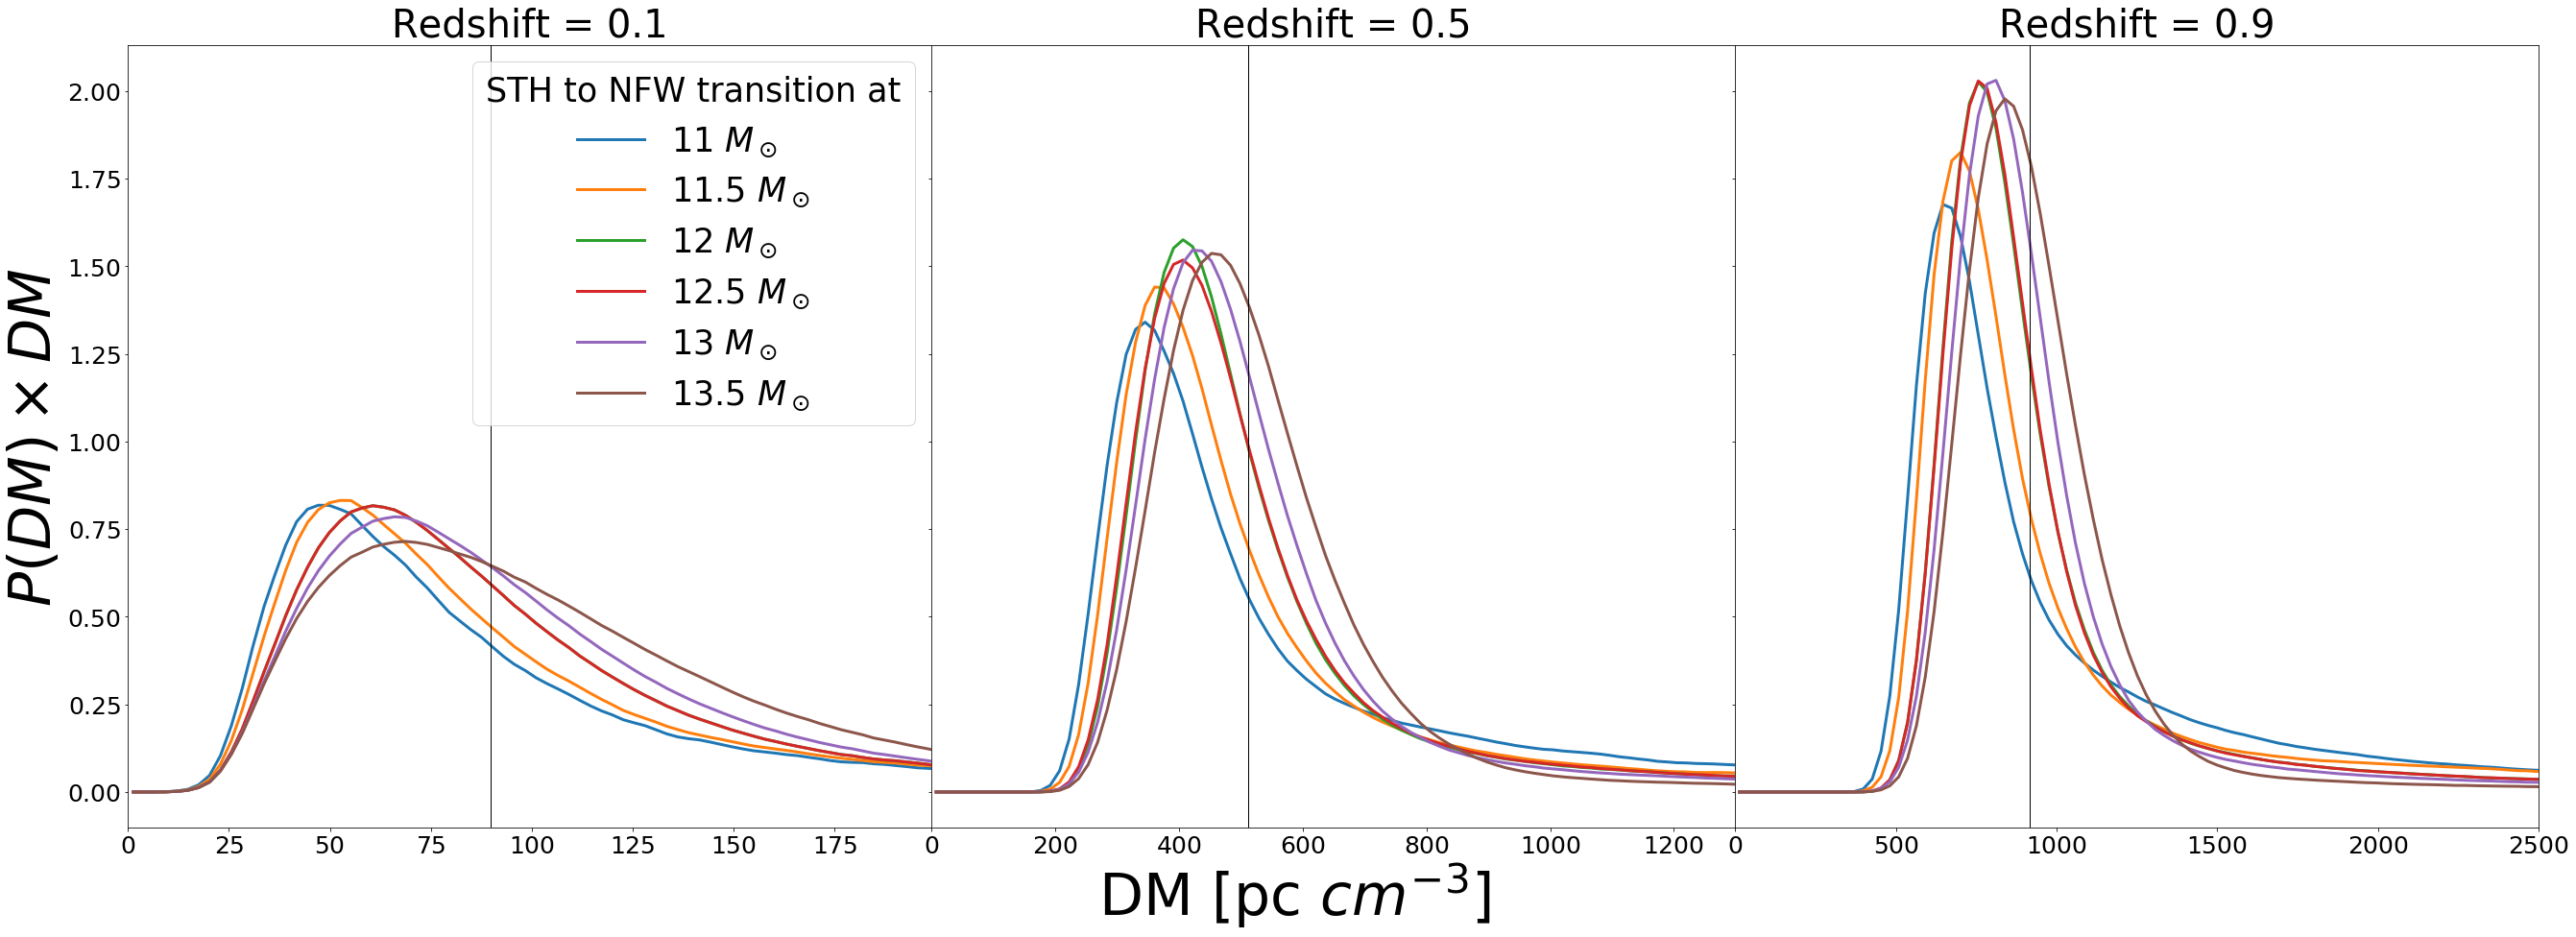

In [113]:


# figure and subplots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(45,15))


curve_lw=3

axs[0].plot(STH_NFW_1_1[0],STH_NFW_1_1[0]*STH_NFW_1_1[1],'-',label='11 $M_\odot$',lw=curve_lw)
axs[0].plot(STH_NFW_1_2[0],STH_NFW_1_2[0]*STH_NFW_1_2[1],'-',label='11.5 $M_\odot$',lw=curve_lw)
axs[0].plot(STH_NFW_1_3[0],STH_NFW_1_3[0]*STH_NFW_1_3[1],'-',label='12 $M_\odot$',lw=curve_lw)
axs[0].plot(STH_NFW_1_4[0],STH_NFW_1_4[0]*STH_NFW_1_4[1],'-',label='12.5 $M_\odot$',lw=curve_lw)
axs[0].plot(STH_NFW_1_5[0],STH_NFW_1_5[0]*STH_NFW_1_5[1],'-',label='13 $M_\odot$',lw=curve_lw)
axs[0].plot(STH_NFW_1_6[0],STH_NFW_1_6[0]*STH_NFW_1_6[1],'-',label='13.5 $M_\odot$',lw=curve_lw)




# Second plot

axs[1].plot(STH_NFW_2_1[0],STH_NFW_2_1[0]*STH_NFW_2_1[1],'-',label='Cutoff 12.5',lw=curve_lw)
axs[1].plot(STH_NFW_2_2[0],STH_NFW_2_2[0]*STH_NFW_2_2[1],'-',label='Cutoff 13',lw=curve_lw)
axs[1].plot(STH_NFW_2_3[0],STH_NFW_2_3[0]*STH_NFW_2_3[1],'-',label='Cutoff 13.5',lw=curve_lw)
axs[1].plot(STH_NFW_2_4[0],STH_NFW_2_4[0]*STH_NFW_2_4[1],'-',label='12.5 $M_\odot$',lw=curve_lw)
axs[1].plot(STH_NFW_2_5[0],STH_NFW_2_5[0]*STH_NFW_2_5[1],'-',label='13 $M_\odot$',lw=curve_lw)
axs[1].plot(STH_NFW_2_6[0],STH_NFW_2_6[0]*STH_NFW_2_6[1],'-',label='13.5 $M_\odot$',lw=curve_lw)




# # Third plot

axs[2].plot(STH_NFW_3_1[0],STH_NFW_3_1[0]*STH_NFW_3_1[1],'-',label='Cutoff 12.5',lw=curve_lw)
axs[2].plot(STH_NFW_3_2[0],STH_NFW_3_2[0]*STH_NFW_3_2[1],'-',label='Cutoff 13',lw=curve_lw)
axs[2].plot(STH_NFW_3_3[0],STH_NFW_3_3[0]*STH_NFW_3_3[1],'-',label='Cutoff 13.5',lw=curve_lw)
axs[2].plot(STH_NFW_3_4[0],STH_NFW_3_4[0]*STH_NFW_3_4[1],'-',label='12.5 $M_\odot$',lw=curve_lw)
axs[2].plot(STH_NFW_3_5[0],STH_NFW_3_5[0]*STH_NFW_3_5[1],'-',label='13 $M_\odot$',lw=curve_lw)
axs[2].plot(STH_NFW_3_6[0],STH_NFW_3_6[0]*STH_NFW_3_6[1],'-',label='13.5 $M_\odot$',lw=curve_lw)



# Axis range
axs[0].set_xlim(xmin=0,xmax=199)
axs[1].set_xlim(xmin=0,xmax=1299)
axs[2].set_xlim(xmin=0,xmax=2500)


# Subplot titles
axs[0].set_title('Redshift = 0.1',fontsize=40)
axs[1].set_title('Redshift = 0.5',fontsize=40)
axs[2].set_title('Redshift = 0.9',fontsize=40)


# Mean DM: set for the given redshift
mean=axs[0].axvline(np.mean(STH_NFW_1[0,:,:]), color='k', linestyle='-', linewidth=1)
axs[1].axvline(np.mean(sum(STH_NFW_1[0:5,:,:])), color='k', linestyle='-', linewidth=1)
axs[2].axvline(np.mean(sum(STH_NFW_1[0:8,:,:])), color='k', linestyle='-', linewidth=1)
# mean.set_label('Mean DM')



# Axis labels
fig.text(0.5, 0.04, 'DM [pc $cm^{-3}$]', ha='center',fontsize=60)
axs[0].set_ylabel(r'$P(DM) \times DM$ ',fontsize=60)


axs[0].ticklabel_format(useMathText=True)
axs[1].ticklabel_format(useMathText=True)
axs[2].ticklabel_format(useMathText=True)
# axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[0].ticker.LogFormatter(base=10.0)
# import matplotlib.ticker as tick
# axs[0].yaxis.set_major_formatter(tick.LogFormatter())


# legend
legend=axs[0].legend(title = 'STH to NFW transition at',fontsize='xlarge',loc='upper right',prop={'size':35})
legend.get_title().set_fontsize('35') #legend 'Title' fontsize


fig.savefig('STH_NFW_transition.pdf',bbox_inches='tight')


# Test Code


## Troubleshooting error for precipitation
Split the redshift array into two arrays and stitch together after evaluation

In [15]:
RS_array1 = RS_array[0:5]
RS_array2 = [RS_array[0],RS_array[5],RS_array[6],RS_array[7],RS_array[8]]

In [16]:
# Stitching two files to resolve the precipitation all redshift issue



all_den_fields_256_RS1 = extract_all_den_fields(RS_array1,den_grid_size)
all_den_fields_256_RS2 = extract_all_den_fields(RS_array2,den_grid_size)

for i in range(1,len(RS_array1)):
    test_s = all_den_fields_256_RS1[i,:,:]
    test_l= (np.repeat((np.repeat(test_s,4,axis=0)),4,axis=1))

    test_sm =  gauss_sinc_smoothing(test_l,4/np.sqrt(3),4,1)
    all_den_fields_256_RS1[i,:,:]= test_sm.reshape([256, 4, 256, 4]).mean(3).mean(1)
    
    
for i in range(1,len(RS_array2)):
    test_s = all_den_fields_256_RS2[i,:,:]
    test_l= (np.repeat((np.repeat(test_s,4,axis=0)),4,axis=1))

    test_sm =  gauss_sinc_smoothing(test_l,4/np.sqrt(3),4,1)
    all_den_fields_256_RS2[i,:,:]= test_sm.reshape([256, 4, 256, 4]).mean(3).mean(1)    
    
    
    

P8_256_RS_array1 = hist_profile(all_den_fields_256_RS1,den_grid_size,RS_array1,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'precipitation',1,8)

np.save('P8_256_RS_array1',P8_256_RS_array1[6])


P8_256_RS_array2 = hist_profile(all_den_fields_256_RS2,den_grid_size,RS_array2,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,'precipitation',1,8)

np.save('P8_256_RS_array2',P8_256_RS_array2[6])


0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

0.7


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

## DM vs radius test for Resolution 16

In [238]:
resolution=16

grid_size = resolution*1024

trim_dim=int((10*resolution)/2+1)  # Need +1 to match the dimensions of the mask grids

# Radial extent of the plots in Mpc
extent = (L/grid_size)*(trim_dim)


In [239]:
# Spherical tophat
# STH_DMvsR=DM_vs_radius(STH8_256[1][0,:,:],df,trim_dim, mass_bins, halos_per_mass_bin)
STH_DMvsR_16=DM_vs_radius(STH16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])

115


In [ ]:
STH8_2_DMvsR_16=DM_vs_radius(STH16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])

In [240]:
# fire simulation
fire_DMvsR_16=DM_vs_radius(fire16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
# fire_DMvsR=DM_vs_radius(fire8_256[1][0,:,:],df,trim_dim, mass_bins, halos_per_mass_bin)

115


In [241]:
# NFW
NFW_DMvsR_16=DM_vs_radius(NFW16_256[1][0,:,:],df[0],trim_dim, df[2], df[1])
# NFW_DMvsR=DM_vs_radius(NFW8_256[1][0,:,:],df,trim_dim, mass_bins, halos_per_mass_bin)


115


In [242]:
# Create profiles of masks

STH_masks_16=profile_of_masks(STH16_256[2][0,:,:,:])
NFW_masks_16=profile_of_masks(NFW16_256[2][0,:,:,:])
fire_masks_16=profile_of_masks(fire16_256[2][0,:,:,:])

In [243]:
# Save DM vs Radius profiles

# np.save('STH_DMvsR_16',STH_DMvsR_16)
# np.save('NFW_DMvsR_16',NFW_DMvsR_16)
np.save('fire_DMvsR_16',fire_DMvsR_16)


# # Save masks

# np.save('STH_masks_16',STH_masks_16)
# np.save('NFW_masks_16',NFW_masks_16)
np.save('fire_masks_16',fire_masks_16)

# np.save('ordered_halo_dataframe',df)


NameError: name 'STH_DMvsR_16' is not defined

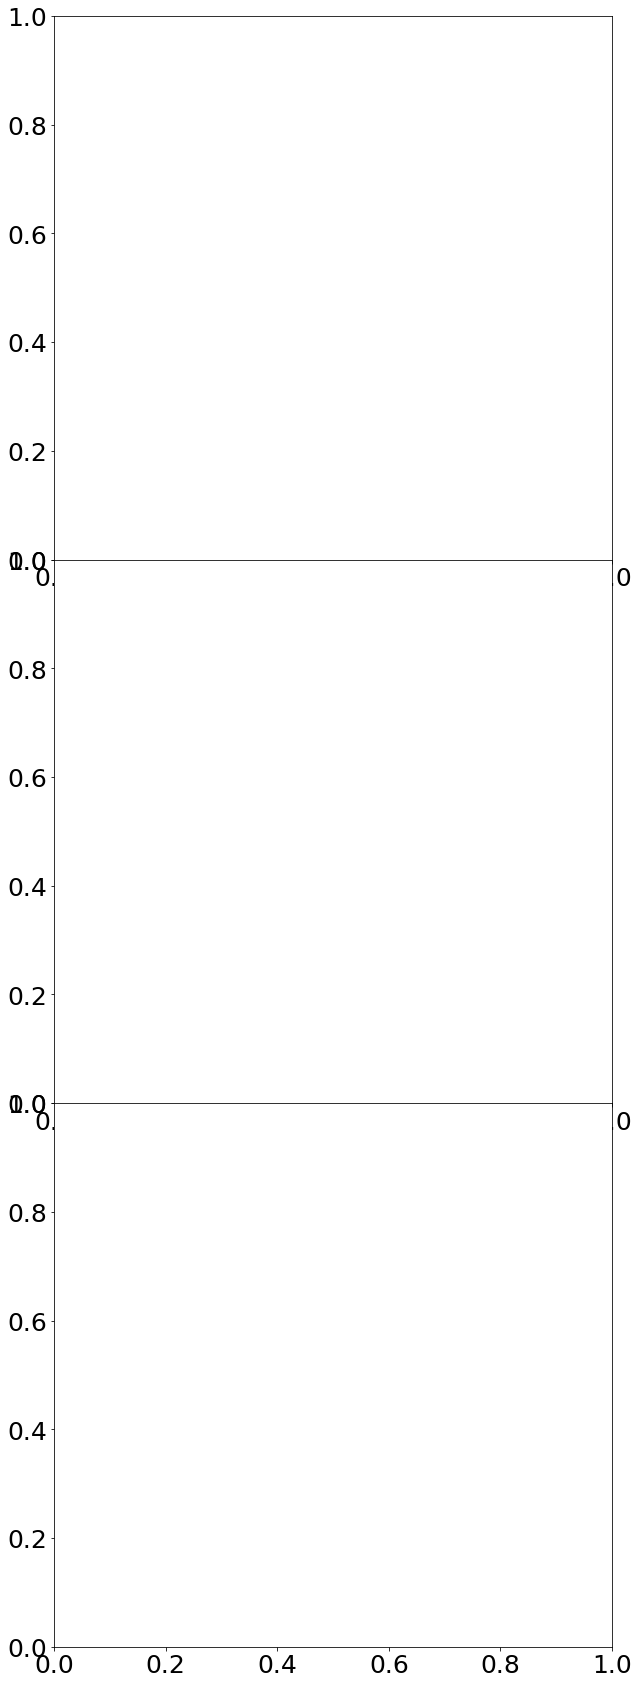

In [250]:
# figure and subplots

MpctoKpc =1000
x_start=40  #kpc: min impact parameter 


DM_Rad_fig_16, DM_Rad_axs = plt.subplots(3, 1,
                        gridspec_kw={'hspace': 0, 'wspace': .2},figsize=(10,30))

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

# plt.rc('axes', titlesize=30)     # fontsize of the axes title
# plt.rc('axes', labelsize=20)    # fontsize of the x and y labels



# First plot

# DM_Rad_axs[0].semilogx(np.linspace(0,extent,TH_DMvsR.shape[1]),TH_DMvsR[M_chosen[0],:]-mean_DM,'-', label= '2D tophat')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,STH_DMvsR_16.shape[1]),STH_DMvsR_16[M_chosen[1],:]-mean_DM,'-', label= '3D Tophat',lw=3,color= 'red')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,fire_DMvsR_16.shape[1]),fire_DMvsR_16[M_chosen[1],:]-mean_DM,'-', label= 'fire',lw=3,color='green')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,NFW_DMvsR_16.shape[1]),NFW_DMvsR_16[M_chosen[1],:]-mean_DM,'-' ,label= 'NFW',lw=3,color='blue')


# Masks
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,STH_masks_16.shape[1]),STH_masks_16[M_chosen[1],:],'--', lw=2,color='red')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,fire_masks_16.shape[1]),fire_masks_16[M_chosen[1],:],'--',lw=2,color='green')
DM_Rad_axs[0].semilogx(MpctoKpc*np.linspace(0,extent,NFW_masks_16.shape[1]),NFW_masks_16[M_chosen[1],:],'--', lw=2,color='blue')


DM_Rad_axs[0].set_ylim([0, 60])
DM_Rad_axs[0].set_xlim([x_start, MpctoKpc*2])


# axis title
# DM_Rad_axs[0].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[1]]),fontsize=14)
DM_Rad_axs[0].text(MpctoKpc*.1, 55, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[1]]),fontsize=20)


# Second plot

# DM_Rad_axs[1].semilogx(np.linspace(0,extent,TH_DMvsR.shape[1]),TH_DMvsR[M_chosen[2],:]-mean_DM,'-', label= '2D tophat',)
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,STH_DMvsR_16.shape[1]),STH_DMvsR_16[M_chosen[2],:]-mean_DM,'-', label= '3D tophat',lw=3,color='red')
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,fire_DMvsR_16.shape[1]),fire_DMvsR_16[M_chosen[2],:]-mean_DM,'-' ,label= 'fire',lw=3,color='green')
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,NFW_DMvsR_16.shape[1]),NFW_DMvsR_16[M_chosen[2],:]-mean_DM,'-', label= 'NFW',lw=3,color='blue')

# Masks
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,STH_masks_16.shape[1]),STH_masks_16[M_chosen[2],:],'--', lw=2,color='red')
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,fire_masks_16.shape[1]),fire_masks_16[M_chosen[2],:],'--',lw=2,color='green')
DM_Rad_axs[1].semilogx(MpctoKpc*np.linspace(0,extent,NFW_masks_16.shape[1]),NFW_masks_16[M_chosen[2],:],'--', lw=2,color='blue')

DM_Rad_axs[1].set_ylim(ymin=0,ymax=199)
DM_Rad_axs[1].set_xlim([x_start, MpctoKpc*2])


# DM_Rad_axs[1].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[2]]),fontsize=14)
DM_Rad_axs[1].text(MpctoKpc*.1, 180, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[2]]),fontsize=20)



# Third plot


DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,STH_DMvsR_16.shape[1]),STH_DMvsR_16[M_chosen[3],:]-mean_DM,'-', label= '3D tophat',lw=3,color='red')
DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,fire_DMvsR_16.shape[1]),fire_DMvsR_16[M_chosen[3],:]-mean_DM,'-', label= 'Fire',lw=3,color='green')
DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,NFW_DMvsR_16.shape[1]),NFW_DMvsR_16[M_chosen[3],:]-mean_DM, '-',label= 'NFW',lw=3,color='blue')


DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,STH_masks_16.shape[1]),STH_masks_16[M_chosen[3],:],'--', lw=2,color='red')
DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,fire_masks_16.shape[1]),fire_masks_16[M_chosen[3],:],'--',lw=2,color='green')
DM_Rad_axs[2].semilogx(MpctoKpc*np.linspace(0,extent,NFW_masks_16.shape[1]),NFW_masks_16[M_chosen[3],:], '--',lw=2,color='blue')




DM_Rad_axs[2].set_ylim(ymin=0,ymax=999)
DM_Rad_axs[2].set_xlim([x_start, MpctoKpc*2])

# DM_Rad_axs[2].set_title('Mass = %.1E' % Decimal(df[2][M_chosen[3]]),fontsize=14)
DM_Rad_axs[2].text(MpctoKpc*.1, 925, 'Mass = %.1E $M_\odot$' % Decimal(df[2][M_chosen[3]]),fontsize=20)



# ticks

# ax.xaxis.grid(True, which='minor')
# DM_Rad_axs[0].xaxis.grid(axis='x', which='minor', bottom=True)

# DM_Rad_axs[0].tick_params(axis='x', which='minor', bottom=True)
# DM_Rad_axs[1].tick_params(axis='x', which='minor', bottom=True)

DM_Rad_axs[0].tick_params(axis='x', which='minor')

# legend

DM_Rad_axs[0].legend(loc='upper right',prop={'size':18})
# DM_Rad_axs[0].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[1].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
# DM_Rad_axs[2].set_ylabel('DM - <DM> [pc $cm^{-3}$]',fontsize=30)
DM_Rad_axs[2].set_xlabel('Impact Parameter [kpc]',fontsize=30)




DM_Rad_fig_16.savefig('DMvsRad_profiles_16.pdf',bbox_inches='tight')

## Rough work for STH+ NFW

In [139]:
# Resolution: choose between 256 and 512 grid
den_grid_size = 256


# User provides a redshift array
# RS_array = [0] # For a single box, we only use the redshift 0 box
RS_array = [avgZ(1),avgZ(2),avgZ(3),avgZ(4),avgZ(5)]


# Profile used for subtracting halos from the density field
subtraction_halo_profile = 'NFW'



In [114]:
# Create density field for the chosen resolution

# all_den_fields_512 = extract_all_den_fields(RS_array,den_grid_size)
# all_den_fields_256_RS = extract_all_den_fields(RS_array,den_grid_size)

In [140]:
# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30


addition_halo_profile = '2RVSTH_and_NFW' 
scaling_radius=1

bin1_STH1_256 = hist_profile(all_den_fields_256_RS,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


In [94]:
all_bins= bin1_STH1_256[1][0,:,:]#+bin2_NFW1_256[1][0,:,:]

def histArray_with_range(arr,nbin,Ncel,DMmin,DMmax):
    hist, bins = np.histogram(arr,bins=nbin,range=(DMmin, DMmax))
    dv=bins[1]-bins[0]
    hist=(hist)/(dv*Ncel**2)
    cumulative = (np.cumsum(hist)*dv)
    center = (bins[:-1] + bins[1:]) / 2
    return center, hist, cumulative[-1]


STH_NFW = histArray_with_range(all_bins,500,1024,0,400)
STH1R = histArray_with_range(STH1_256[1],500,1024,0,400)
STH2R = histArray_with_range(STH1_2_256[1],500,1024,0,400)
NFW = histArray_with_range(NFW1_256[1],500,1024,0,400)
fire = histArray_with_range(fire1_256[1],500,1024,0,400)

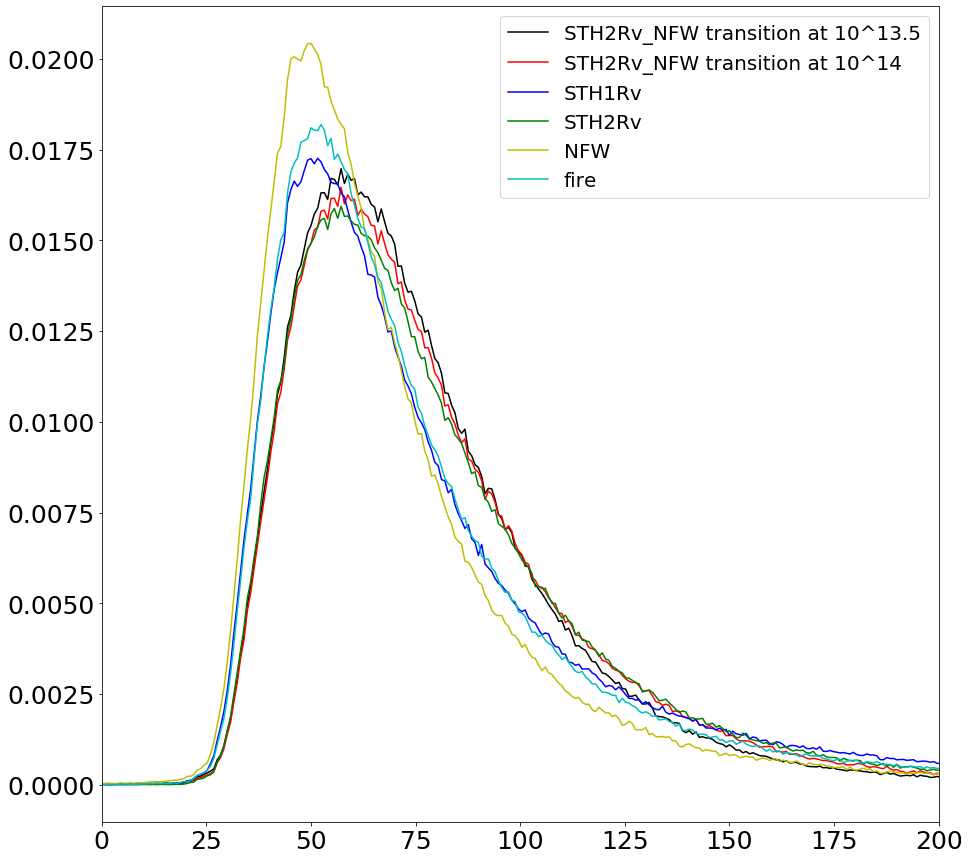

In [110]:
plt.rcParams["figure.figsize"] = (15,15)
# plt.plot(STH_NFW[0],STH_NFW[1],'.',label='STH2Rv_NFW')
plt.plot(STH4_NFW_hist[0],STH4_NFW_hist[1],'k',label='STH2Rv_NFW transition at 10^13.5')
plt.plot(STH4_NFW_14_hist[0],STH4_NFW_14_hist[1],'r',label='STH2Rv_NFW transition at 10^14')
plt.plot(STH1R[0],STH1R[1],'b',label='STH1Rv')
plt.plot(STH2R[0],STH2R[1],'g',label='STH2Rv')
plt.plot(NFW[0],NFW[1],'y',label='NFW')
plt.plot(fire[0],fire[1],'c',label='fire')


plt.legend(loc='upper right')
plt.xlim(0,200)
plt.savefig('NFW_Tophat_combined.pdf',bbox_inches='tight')

In [89]:
# This one is where we transition at 10**13.5

# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30


addition_halo_profile = '2RVSTH_and_NFW' 
scaling_radius=1

STH4_NFW_256 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)




/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


In [96]:
STH4_NFW_hist= histArray_with_range(STH4_NFW_256[1][0,:,:],500,1024,0,400)

In [105]:
# This one is where we transition at 10**14

# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30


addition_halo_profile = '2RVSTH_and_NFW' 
scaling_radius=1

STH4_NFW_14 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)

STH4_NFW_14_hist= histArray_with_range(STH4_NFW_14[1][0,:,:],500,1024,0,400)


/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


In [141]:
# Compare things at RS =.5 for each profile
STH_NFW_RShalf = histArray_with_range(sum(bin1_STH1_256[6][0:5,:,:]),100,1024,0,1000)
STH_RShalf = histArray_with_range(sum(STH1_256_RS_array[6][0:5,:,:]),100,1024,0,1000)
STH_2_RShalf = histArray_with_range(sum(STH1_2_256_RS_array[6][0:5,:,:]),100,1024,0,1000)
NFW_RShalf = histArray_with_range(sum(NFW1_256_RS_array[6][0:5,:,:]),100,1024,0,1000)
fire_RShalf = histArray_with_range(sum(fire1_256_RS_array[6][0:5,:,:]),100,1024,0,1000)



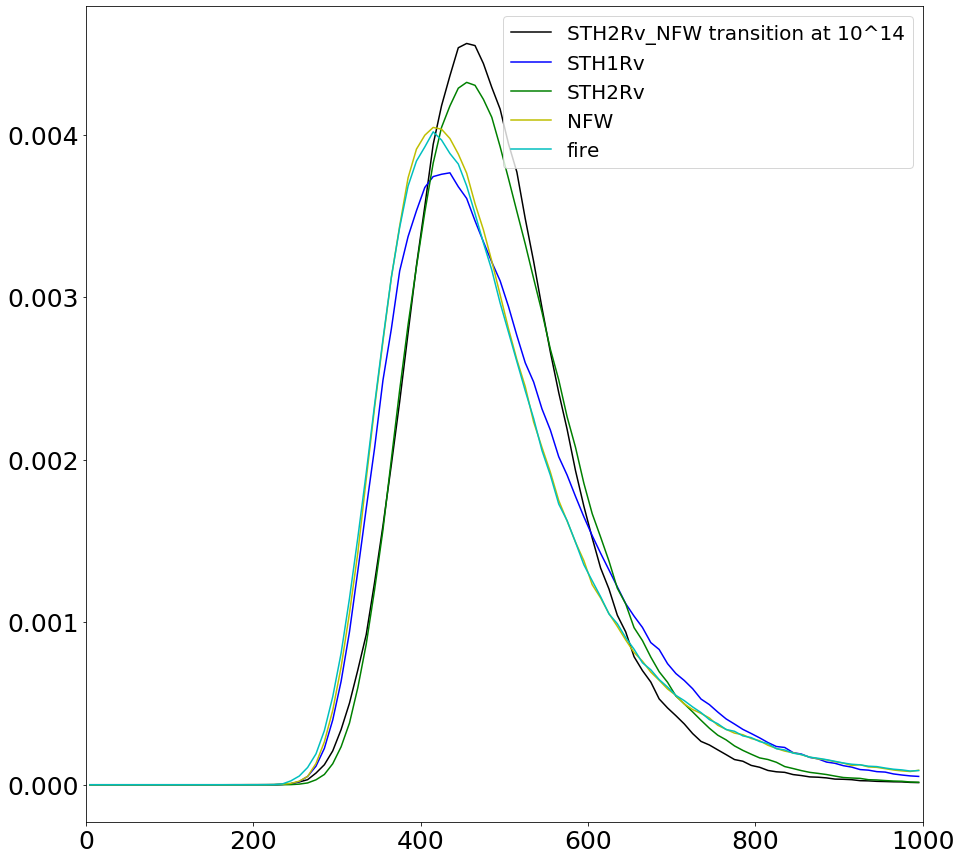

In [158]:
plt.rcParams["figure.figsize"] = (15,15)
# plt.plot(STH_NFW[0],STH_NFW[1],'.',label='STH2Rv_NFW')
plt.plot(STH_NFW_RShalf[0],STH_NFW_RShalf[1],'k',label='STH2Rv_NFW transition at 10^14')
plt.plot(STH_RShalf[0],STH_RShalf[1],'b',label='STH1Rv')
plt.plot(STH_2_RShalf[0],STH_2_RShalf[1],'g',label='STH2Rv')
plt.plot(NFW_RShalf[0],NFW_RShalf[1],'y',label='NFW')
plt.plot(fire_RShalf[0],fire_RShalf[1],'c',label='fire')


plt.legend(loc='upper right')
plt.xlim(0,1000)
plt.savefig('NFW_Tophat_combined_RS.pdf',bbox_inches='tight')

# Testing precipitation model


### When testing, from the files below, only run the ones that you change

In [3]:
# This chapter contains contains all cosmological parameters, as well as other basic functions 
%run FRBProject-Chap1-ParametersAndFunctions.ipynb

# These chapters extracts data from simulation files 
%run FRBProject-Chap2-ExtractData-256Grid.ipynb
%run FRBProject-Chap3-ExtractData-Halos.ipynb
#%run FRBProject-Chap2-ExtractData-512Grid.ipynb


# This chapter is the core of the method developed in this project
%run FRBProject-Chap4-Convolution.ipynb


# This chapter contains functions for creating dispersion measure profiles of halos
%run FRBProject-Chap5-DMProfiles.ipynb


# This chapter contains functions to stack boxes to project a sightline to higher redshifts
%run FRBProject-Chap6-Stacking.ipynb



In [15]:
# Create a data frame of halos
df= create_halo_array_for_convolution(extract_halos(0),min_mass,max_mass,log_bins)

In [12]:
# Resolution: choose between 256 and 512 grid
den_grid_size = 256



# User provides a redshift array
RS_array_1 = [0] # For a single box, we only use the redshift 0 box



# Profile used for subtracting halos from the density field
subtraction_halo_profile = 'NFW'


# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30


In [13]:
# Create density field for the chosen resolution

# all_den_fields_512 = extract_all_den_fields(RS_array,den_grid_size)
all_den_fields_256 = extract_all_den_fields(RS_array_1,den_grid_size)

In [14]:
### Tophat 256 fieild


addition_halo_profile = 'precipitation'

scaling_radius = 1 

# p1 = hist_profile(all_den_fields_256,den_grid_size,RS_array_1,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)


# addition_halo_profile = 'fire'

# fire1 = hist_profile(all_den_fields_256,den_grid_size,RS_array,min_mass,max_mass,
#                                        log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,1)




p8 = hist_profile(all_den_fields_256,den_grid_size,RS_array_1,min_mass,max_mass,
                                       log_bins,subtraction_halo_profile,addition_halo_profile,scaling_radius,8)



/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until
/epyc/opt/anacon

In [43]:
np.save('p8',p8)

In [17]:
p8_hist = histArray(p8[6][0,:,:],1000,1024*8)

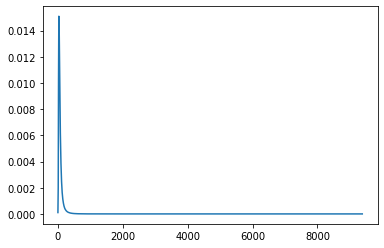

In [19]:
plt.plot(p8_hist[0],p8_hist[1])

# Rough work

## Mask analysis

In [16]:
# Specify resolution
resolution=1
grid_size = resolution*1024
# trim_dim=int((10*resolution)/2+1)  # Need +1 to match the dimensions of the mask grids
# trim_dim=int((10*resolution)+1)  # Need +1 to match the dimensions of the mask grids

trim_dim=int((20*resolution))

# Radial extent of the plots in Mpc
extent = (L/grid_size)*(trim_dim)



# # STH_DMvsR=DM_vs_radius(STH8_256[1][0,:,:],df,trim_dim, mass_bins, halos_per_mass_bin)
# STH1_rad=DM_vs_radius(STH1_256[1][0,:,:],df[0],trim_dim, df[2], df[1])


p1_rad=DM_vs_radius(p1[1][0,:,:],df[0],trim_dim, df[2], df[1])
p1_masks = profile_of_masks(p1[2][0,:,:,:])




# fire1_rad=DM_vs_radius(fire1[1][0,:,:],df[0],trim_dim, df[2], df[1])
# fire1_masks = profile_of_masks(fire1[2][0,:,:,:])



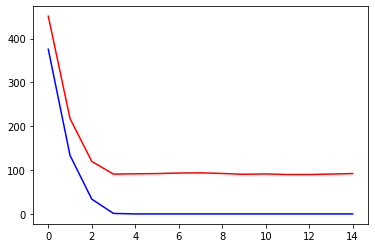

In [17]:
plt.plot(p1_rad[0][22,:],'r')
plt.plot(p1_masks[22,:],'b')


117.62361459419937

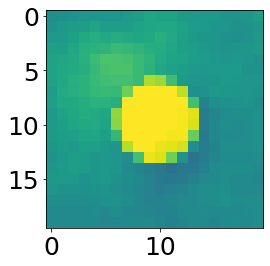

In [1069]:
plt.imshow(p1_rad[1][28,:,:],vmin=0,vmax=200)
np.mean(p1_rad[1][28,:,:])

42.38448343689618

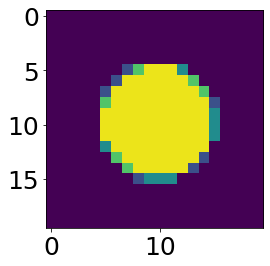

In [1070]:
plt.imshow(p1[2][0,28,:,:],vmin=0,vmax=200)
np.mean(p1[2][0,28,:,:])

In [28]:
# Specify resolution
resolution=8
grid_size = resolution*1024
# trim_dim=int((10*resolution)/2+1)  # Need +1 to match the dimensions of the mask grids
# trim_dim=int((10*resolution)+1)  # Need +1 to match the dimensions of the mask grids

trim_dim=int((20*resolution))

# Radial extent of the plots in Mpc
extent = (L/grid_size)*(trim_dim)



# # STH_DMvsR=DM_vs_radius(STH8_256[1][0,:,:],df,trim_dim, mass_bins, halos_per_mass_bin)
# STH1_rad=DM_vs_radius(STH1_256[1][0,:,:],df[0],trim_dim, df[2], df[1])


p8_rad=DM_vs_radius(p8[1][0,:,:],df[0],trim_dim, df[2], df[1])
p8_masks = profile_of_masks(p8[2][0,:,:,:])
 



# fire1_rad=DM_vs_radius(fire1[1][0,:,:],df[0],trim_dim, df[2], df[1])
# fire1_masks = profile_of_masks(fire1[2][0,:,:,:])



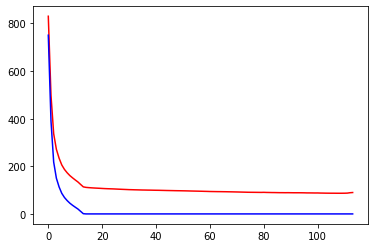

In [32]:
plt.plot(p8_rad[0][18,:],'r')
plt.plot(p8_masks[18,:],'b')


In [45]:
orig_den_256.shape

(256, 256)

In [46]:
orig_den_256

array([[ 88.77668841,  94.37661312,  75.42460666, ...,  61.82413765,
         59.3357733 ,  66.69326014],
       [130.52619285, 136.03045599, 100.38668789, ...,  67.25481509,
         71.09717759,  91.92203866],
       [138.01283716, 137.11351156,  98.9542461 , ...,  70.43247067,
         81.58563115, 104.92650771],
       ...,
       [ 50.85476453,  57.92748349,  52.73309721, ...,  67.14563643,
         49.78011631,  43.73973654],
       [ 47.3209417 ,  52.27392706,  49.77782148, ...,  60.95803673,
         49.17459151,  43.05379878],
       [ 55.62443852,  59.47432127,  53.37049114, ...,  55.94238535,
         50.09167932,  48.09016277]])

In [49]:
orig2=np.transpose(orig_den_256, axes=0)


ValueError: axes don't match array

# Fire profile normalization test

Qs:
What should ne_test be on figure 15?


In [76]:
rv=vir_rad_ar[M_chosen[2]]*Mpc
r0=.3*rv
M_h = avg_mass_ar[M_chosen[2]]*msun
fb= (OmegaB/OmegaM)


In [169]:
vir_rad_ar[M_chosen[2]]

0.27998441583741557

In [171]:
avg_mass_ar[M_chosen[2]]/10**12

1.2388016436831522

In [164]:
ne_test = (0.3)*fb*M_h/((np.pi*4*r0**2*rv*1.22*mprot))

In [165]:
ne_test

8.542289941931014e-05

In [166]:
fb

0.1737037037037037

In [79]:
redshift=0
MfbMh = np.array([0.1,0.2,0.3])
Mh = msun*np.array([10**10,10**11,10**12])
rv = Mpc*np.array([vir_rad(10**10,redshift),vir_rad(10**11,redshift),vir_rad(10**12,redshift)]) # radii for the given mass bins
r0= .3*rv
ne_test = MfbMh*Mh*fb /((np.pi*4*r0**2*rv*1.22*mprot))
 


In [80]:
ne_test

array([6.36145011e-05, 1.27229002e-04, 1.90843503e-04])

In [15]:
vir_rad(1.6*10**10,0)

0.050250328431506

In [16]:
vir_rad_ar

array([0.05126794, 0.05776256, 0.06506286, 0.07332489, 0.0826082 ,
       0.09303334, 0.10479254, 0.11802396, 0.13295867, 0.14977042,
       0.16874879, 0.19007495, 0.21417371, 0.24112256, 0.2716898 ,
       0.30572004, 0.34450718, 0.38815198, 0.43759916, 0.4917892 ,
       0.55602972, 0.6241843 , 0.70651818, 0.79357985, 0.89439302,
       1.00948585, 1.1292786 , 1.27300004, 1.43960719])

In [32]:
avg_mass_ar

NameError: name 'avg_mass_ar' is not defined

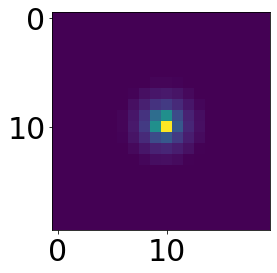

In [88]:
plt.imshow(fire1_256[2][0,28,:,:])

# Issue: mask and virial radius do not coincide

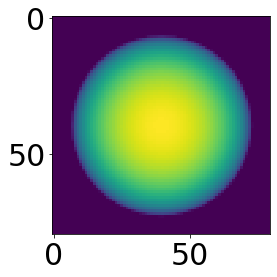

In [208]:
plt.imshow(STH8_256[2][0,28,40:120,40:120])


In [209]:
prof=profile_of_masks(STH8_256[2][0,:,40:120,40:120])

In [210]:
vir_rad1 = STH8_256[7]

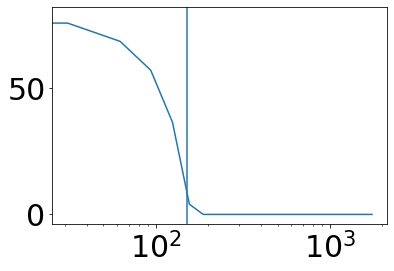

In [213]:
plt.semilogx(MpctoKpc*np.linspace(0,extent/2,(prof[12].shape)[0]),prof[12])
plt.axvline(MpctoKpc*(vir_rad1[12]/np.sqrt(2)))

In [54]:
vir_rad_ar[28]/(L/(1024*8))

33.02113379000243

In [50]:
L/(1024*8)

0.04359654017857143

In [144]:
vir_rad_ar

array([0.06702141, 0.07551168, 0.0850552 , 0.09585596, 0.10799182,
       0.12162037, 0.1369929 , 0.15429004, 0.17381384, 0.19579146,
       0.22060145, 0.24848065, 0.27998442, 0.31521402, 0.35517388,
       0.39966084, 0.45036638, 0.50742224, 0.57206341, 0.64290482,
       0.72688498, 0.81598191, 0.92361511, 1.03742885, 1.16921961,
       1.31967785, 1.47628018, 1.66416394, 1.88196567])

In [93]:
df

(          row_id           x           y           z             Mvir  \
 2933824  2933825  128.436203   20.074301  151.222198      10030000128   
 7232500  7232501  175.326294  161.963898  126.147301      10030000128   
 8687376  8687377  228.614105  210.141296  235.611496      10030000128   
 7232583  7232584  161.794800  170.606293  133.106293      10030000128   
 1787405  1787406  209.638901   47.312801   60.795898      10030000128   
 ...          ...         ...         ...         ...              ...   
 5649210  5649211  161.651703  177.072403  185.572205  300199993933824   
 7863434  7863435   29.437401  118.886902  223.270004  306199996137472   
 5925615  5925616   92.365097  111.443398  220.449905  306800016490496   
 2139521  2139522   44.932701  210.152603  196.927994  309000012824576   
 473712    473713   61.034599  221.666000  165.402206  312600000724992   
 
                     Mtot    Rvir   ix   iy   iz  
 2933824      13690000384  0.0257  526   82  619  
 7232500

In [96]:
# Resolution: choose between 256 and 512 grid
den_grid_size = 256



# User provides a redshift array
RS_array = [0] # For a single box, we only use the redshift 0 box



# Profile used for subtracting halos from the density field
subtraction_halo_profile = 'NFW'


# Mass range of halos
min_mass=10**10
max_mass=10**14.5
log_bins=30

df= create_halo_array_for_convolution(extract_halos(0),min_mass,max_mass,log_bins)

df1= df[0]
binz= df[1]
mass_binz = df[2]



In [291]:
ext_1 = L/(1024*8)*40

In [289]:
redshift=0
scaling_radius=1
addition_halo_profile = 'tophat_spherical'
resolution=8
test_mask = test_add_halos(df1,mass_binz,resolution,len(binz)-1,binz,addition_halo_profile,scaling_radius,redshift)



KeyboardInterrupt: 

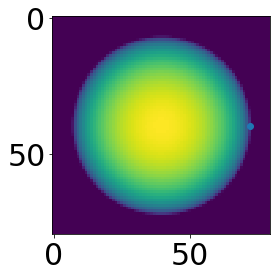

In [206]:
plt.imshow(test_mask[6][28,40:120,40:120])
plt.scatter(40+32,40+32)

In [201]:
vir_rad1[28]/(L/(1024*8))

32.72510539633339

In [260]:
prof=profile_of_masks(test_mask[6][:,40:120,40:120])

In [261]:
vir_rad1 = test_mask[1]

In [299]:
vir_rad1[12]

0.2122536861071108

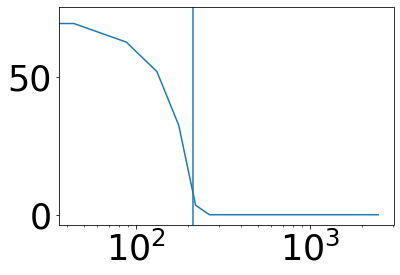

In [297]:
plt.semilogx(np.sqrt(2)*MpctoKpc*np.linspace(0,ext_1,(prof[12].shape)[0]),prof[12])
plt.axvline(MpctoKpc*(vir_rad1[12]))

In [97]:
# Status: This is the latest convolution function

# The function convolves halos

# arguments: 
# haloArray: array of halos
# resolution: 1024 or 2048
# chunks: no of chunks the halo array has been divided into -1
# bins: array cumulative sum of halos in different mass bins
# profile: tophat, NFW etc
# scaling_radius: scale radius for tophat halos

def test_add_halos(haloArray,mass_binz,resolution,chunks,bins,profile,scaling_radius,redshift):
    
    
    df = haloArray
    no_cells = 1024* resolution
    cellsize = L/(1024*resolution) 
    
    
    # array of halo masses and radii
    Mvir_avg = np.zeros(chunks)
    conv_rad = np.zeros(chunks)
    Rvir_avg = np.zeros(chunks)

    # convolution mask array
    convolution =np.zeros([chunks,no_cells,no_cells])
    
    
    # creating a coarse map out of a fine mask
    
    # fine mask
    # fine mask size has to correspond to the size of the mask that I eventually trim
    fine_mask_len = 20*resolution  
    fine_lower= -1*fine_mask_len
    fine_upper= fine_mask_len
    y,x = np.ogrid[fine_lower: fine_upper, fine_lower:fine_upper]
    
    
    # coarse mask
    scale_down = 2  # making the grid coarser
    smooth_r=2
    
    
#     coarse_mask_len = int(fine_mask_len/scale_down)
    fine_mask= np.zeros([fine_mask_len,fine_mask_len])
# #     fine_mask= np.zeros([2*coarse_mask_len,2*coarse_mask_len])
    
    
    
    # store all profile masks
    nbig = fine_mask_len*2
    nsmall = int(nbig/scale_down)
    addition_masks =np.zeros([chunks,nsmall,nsmall])
    
    # loops through the list of dataframes each ordered by ascending mass
    
    for j in range(0,chunks):
        Mvir_avg[j] = np.mean((df['Mvir'][bins[j]:bins[j+1]]))/h
        conv_rad[j] = (1+redshift)*((Mvir_avg[j])**(1/3) / Rvir_den(redshift)) # comoving radius
      
            
        
        # NFW 
        # add redshift to the function above
        R_s=0
        rho_nought=0
        
        R_s= conv_rad[j]/(halo_conc(redshift,Mvir_avg[j])*cellsize)  
        rho_nought = rho_0(redshift,Mvir_avg[j],R_s)
        
        
        
        # Why are we multiplying by scale_down
        if profile == 'tophat':
            r = (x**2+y**2)**.5
            fine_mask = r <= (scaling_radius*scale_down*conv_rad[j]/cellsize) 
            fine_mask=fine_mask.astype(float)

            
        # spherical tophat
        elif profile == 'tophat_spherical':
            r = (x**2+y**2)**.5
            fine_mask = r <= (scaling_radius*scale_down*conv_rad[j]/cellsize)
            
            fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
            Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
            fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
        
        
        elif profile == 'NFW':
            
            vec_integral = np.vectorize(NFW2D)
            fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)
            
            r=(x**2+y**2)**.5 # * scale_down
            
            fine_mask=fine_mask.astype(float)
            fine_mask[r> scale_down*conv_rad[j]/cellsize] =0 
            
            
        
        
        elif profile == 'custom':
            
            # Functions for profile
            # Currently hardcoded but should allow the user to provide the function as inputs
            
            f1_1 = lambda x,y,z: 1/(x**2+y**2+z**2+.5)**.5
            f1_2 = lambda x,y,z: 1/(x**2+y**2+z**2+.5)
            
            # Radius of first profile:
            R= (scaling_radius*scale_down*conv_rad[j]/cellsize)/2 
            
            
            
            
            
            vec_integral = np.vectorize(func3Dto2D)
            
            mask1 = x**2+y**2 < (R/2)**2
            mask1 = mask1.astype(float)*vec_integral(f1_1,x,y,R/2)

            mask2_1 = x**2+y**2 >= (R/2)**2
            mask2_1= mask2_1.astype(float)
            mask2_2 = x**2+y**2 <= (R)**2
            mask2_2= mask2_2.astype(float)
            mask2=mask2_1*mask2_2
            mask2 = mask2*vec_integral(f1_2,x,y,R)


            fine_mask=mask1+mask2
            
        
        elif profile == 'custom_tophat':
            
            # Functions for profile
            # Currently hardcoded but should allow the user to provide the function as inputs
            
            # Radius of first profile:
            R= (scaling_radius*scale_down*conv_rad[j]/cellsize)
            
            
            f1_1 = lambda x,y,z: np.exp(-((x**2+y**2+z**2)/R**2)**30)
            
            vec_integral = np.vectorize(func3Dto2D)
            
            mask1 = vec_integral(f1_1,x,y,R)

            fine_mask=mask1
        
        
        ## testing code to add Fire simulation halos
        elif profile == "fire":
        
            %run gasProfile_Fire.ipynb
            fine_mask = rhogasFire(Mvir_avg[j],conv_rad[j], redshift, adjustmentfactor,resolution)[2]
        
        
        
        # Precipitation model
        elif profile == "precipitation":
        
            %run gasProfile_precipitation.ipynb
            

            fine_mask = nePrecipitation(np.log10(Mvir_avg[j]),1000*conv_rad[j],resolution,redshift)[1]
        
        
        elif profile == "2RVSTH_and_NFW_13.5":
            if Mvir_avg[j] <= 10**13.5:
                
                r = (x**2+y**2)**.5
                
                # Don't hardcode scaling radius, change later
                fine_mask = r <= ((2*scaling_radius)*scale_down*conv_rad[j]/cellsize)
            
                fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
                Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
                fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
            elif Mvir_avg[j] > 10**13.5:
                vec_integral = np.vectorize(NFW2D)
                fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)

                r=(x**2+y**2)**.5 # * scale_down

                fine_mask=fine_mask.astype(float)
                fine_mask[r> scale_down*conv_rad[j]/cellsize] =0 
        
        
        elif profile == "2RVSTH_and_NFW_13":
            if Mvir_avg[j] <= 10**13:
                
                r = (x**2+y**2)**.5
                
                # Don't hardcode scaling radius, change later
                fine_mask = r <= ((2*scaling_radius)*scale_down*conv_rad[j]/cellsize)
            
                fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
                Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
                fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
            elif Mvir_avg[j] > 10**13:
                vec_integral = np.vectorize(NFW2D)
                fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)

                r=(x**2+y**2)**.5 # * scale_down

                fine_mask=fine_mask.astype(float)
                fine_mask[r> scale_down*conv_rad[j]/cellsize] =0 
        
        
        
        elif profile == "2RVSTH_and_NFW_12.5":
            if Mvir_avg[j] <= 10**12.5:
                
                r = (x**2+y**2)**.5
                
                # Don't hardcode scaling radius, change later
                fine_mask = r <= ((2*scaling_radius)*scale_down*conv_rad[j]/cellsize)
            
                fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
                Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
                fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
            elif Mvir_avg[j] > 10**12.5:
                vec_integral = np.vectorize(NFW2D)
                fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)

                r=(x**2+y**2)**.5 # * scale_down

                fine_mask=fine_mask.astype(float)
                fine_mask[r> scale_down*conv_rad[j]/cellsize] =0 
        
        
        
        elif profile == "2RVSTH_and_NFW_12":
            if Mvir_avg[j] <= 10**12:
                
                r = (x**2+y**2)**.5
                
                # Don't hardcode scaling radius, change later
                fine_mask = r <= ((2*scaling_radius)*scale_down*conv_rad[j]/cellsize)
            
                fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
                Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
                fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
            elif Mvir_avg[j] > 10**12:
                vec_integral = np.vectorize(NFW2D)
                fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)

                r=(x**2+y**2)**.5 # * scale_down

                fine_mask=fine_mask.astype(float)
                fine_mask[r> scale_down*conv_rad[j]/cellsize] =0 
        
        
        
        elif profile == "2RVSTH_and_NFW_11.5":
            if Mvir_avg[j] <= 10**11.5:
                
                r = (x**2+y**2)**.5
                
                # Don't hardcode scaling radius, change later
                fine_mask = r <= ((2*scaling_radius)*scale_down*conv_rad[j]/cellsize)
            
                fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
                Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
                fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
            elif Mvir_avg[j] > 10**11.5:
                vec_integral = np.vectorize(NFW2D)
                fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)

                r=(x**2+y**2)**.5 # * scale_down

                fine_mask=fine_mask.astype(float)
                fine_mask[r> scale_down*conv_rad[j]/cellsize] =0 
                
                
                
        
        elif profile == "2RVSTH_and_NFW_11":
            if Mvir_avg[j] <= 10**11:
                
                r = (x**2+y**2)**.5
                
                # Don't hardcode scaling radius, change later
                fine_mask = r <= ((2*scaling_radius)*scale_down*conv_rad[j]/cellsize)
            
                fine_mask=fine_mask.astype(float)
#             mask5 = mask5* (2*(((scaling_radius*scale_down*conv_rad[j]/cellsize)**2-(r**2))**2)**.25)
            
                Rv= (scaling_radius*scale_down*conv_rad[j]/cellsize)
                fine_mask = fine_mask* ((((1)**2-((r/Rv)**2))**2)**.25)
            
            elif Mvir_avg[j] > 10**11:
                vec_integral = np.vectorize(NFW2D)
                fine_mask =vec_integral(x,y,rho_nought,R_s,conv_rad[j]/cellsize)

                r=(x**2+y**2)**.5 # * scale_down

                fine_mask=fine_mask.astype(float)
                fine_mask[r> scale_down*conv_rad[j]/cellsize] =0        
                
                
                
        
        
        # Smoothing method: reshaping
        # Generating coarse grid from fine grid: reshape method
        
        
        nsmall = int(nbig/scale_down)
        
        coarse_mask = fine_mask.reshape([nsmall, nbig//nsmall, nsmall, nbig//nsmall]).mean(3).mean(1)
        
        
        
        
        # Area of cells needed for normalization
        totalcellArea4=0
        totalcellArea4 = sum(sum(coarse_mask))* ((cellsize)**2)
        


        # populate array with halos
        halo_cell_pos = np.zeros([no_cells,no_cells])    
        
        # The coordinates are being multiplied by 4 to yield the halo coordinates on the 1024 grid
        ix = ((((np.around(4*resolution*((df[bins[j]:bins[j+1]]['x'].values)/(250/256))))))%(resolution*1024)).astype(int)
        iy = ((((np.around(4*resolution*((df[bins[j]:bins[j+1]]['y'].values)/(250/256))))))%(resolution*1024)).astype(int)
        
        
        xy=(ix,iy)

        # issue: the method does not add repeated coordinates
        halo_cell_pos[xy] += 1
        
        
        
        # convolve the mask and the halo positions
        
        convolution[j,:,:] = (Mvir_avg[j]/(totalcellArea4))*convolve(halo_cell_pos,coarse_mask)
        
        
        
        # store addition masks
        addition_masks[j,:,:]= (Mvir_avg[j]/(totalcellArea4))*(Mpc**-3 *10**6)*nPS*(OmegaB/OmegaM)*coarse_mask
        

    
    return (convolution.sum(0))*(Mpc**-3 *10**6)*nPS*(OmegaB/OmegaM), conv_rad, Rvir_avg, fine_mask, coarse_mask,halo_cell_pos,addition_masks,Mvir_avg

    
